This code is working up to section 6
- **Version by 08.26.25 (2:30 PM)**
- **Added Classifier Code**


# RECIPE RECOMMENDATION SYSTEM


**PROJECT OBJECTIVE:**
Build an end-to-end machine learning pipeline that transforms raw recipe data into
personalized, intelligent food recommendations supporting diverse dietary needs and health goals.

**Core Capabilities:**
- Multi-modal recipe analysis (nutrition, ingredients, cooking methods, images)
- Personalized recommendations based on dietary restrictions and health goals
- Scalable ML pipeline with feature engineering and model evaluation
- Production-ready modular architecture

**Business Value:**
- Helps users discover recipes aligned with their health and dietary preferences
- Reduces food waste by suggesting recipes based on available ingredients
- Supports meal planning for specific nutritional goals (weight loss, muscle gain, etc.)
- Enables food businesses to provide personalized recommendations

**Technical Approach:**
1. Data Engineering: Clean and standardize 100K+ recipe dataset
2. Feature Engineering: Extract nutritional, dietary, and behavioral features
3. ML Pipeline: Build predictive models for nutrition estimation
4. Recommendation Engine: Hybrid content-based + collaborative filtering
5. Visual Analysis: Extract features from food images
6. Deployment: Web interface for real-time recommendations

**Success Metrics:**
- Recommendation accuracy and user satisfaction
- Model performance (R¬≤ score for nutrition prediction)
- System scalability and response time
- Coverage of dietary restrictions and health goals

# redipe-recs 2

## 1.PROJECT SETUP & DATA LOADING


Objective: Load and initially explore the MM-Food-100K dataset
- Load dataset from Hugging Face
- Perform initial data quality assessment
- Set up project environment and dependencies


In [1]:
# Install libraries (only run once)
!pip install torch_geometric
!pip install datasets

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import os
import json
import ast
import re
from collections import Counter
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from PIL import Image
import requests
from io import BytesIO
import cv2
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, SAGEConv, HeteroConv
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import umap

# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Optional advanced imports (with error handling)
try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except ImportError:
    XGB_AVAILABLE = False
    print("XGBoost not available. Install with: pip install xgboost")

def load_and_explore_dataset():
    """Load the MM-Food-100K dataset and perform initial exploration"""
    print("Loading dataset from Hugging Face...")

    # Load the dataset
    dataset = load_dataset("Codatta/MM-Food-100K")

    # Convert to pandas DataFrame for easier manipulation
    df = pd.DataFrame(dataset['train'])

    print(f"Dataset shape: {df.shape}")
    print("\nDataset columns:")
    print(df.columns.tolist())

    # Display basic info
    print("\nDataset info:")
    print(df.info())

    # Display first few rows
    print("\nFirst 5 rows:")
    display(df.head())

    return df

# Load the dataset
df_raw = load_and_explore_dataset()

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 63.1/63.1 kB 3.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 47.7 MB/s eta 0:00:00
Loading dataset from Hugging Face...


README.md: 0.00B [00:00, ?B/s]

MM-Food-100K.csv:   0%|          | 0.00/28.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Dataset shape: (100000, 10)

Dataset columns:
['image_url', 'camera_or_phone_prob', 'food_prob', 'dish_name', 'food_type', 'ingredients', 'portion_size', 'nutritional_profile', 'cooking_method', 'sub_dt']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   image_url             100000 non-null  object 
 1   camera_or_phone_prob  100000 non-null  float64
 2   food_prob             100000 non-null  float64
 3   dish_name             99998 non-null   object 
 4   food_type             100000 non-null  object 
 5   ingredients           100000 non-null  object 
 6   portion_size          100000 non-null  object 
 7   nutritional_profile   100000 non-null  object 
 8   cooking_method        98642 non-null   object 
 9   sub_dt                100000 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory

image_url  camera_or_phone_prob  \
0  https://file.b18a.io/7843322356500104680_44354...                   0.7   
1  https://file.b18a.io/7833227147700100732_67487...                   0.7   
2  https://file.b18a.io/7832600581600103585_26423...                   0.8   
3  https://file.b18a.io/7839056601700101188_98515...                   0.7   
4  https://file.b18a.io/7837642737500100261_17312...                   0.8   

   food_prob            dish_name                  food_type  \
0       0.95        Fried Chicken            Restaurant food   
1       1.00                  Pho            Restaurant food   
2       0.95  Pan-fried Dumplings            Restaurant food   
3       1.00              Bananas  Raw vegetables and fruits   
4       0.90      Noodle Stir-Fry            Restaurant food   

                                         ingredients  \
0                       ["chicken","breading","oil"]   
1  ["noodles","beef","basil","lime","green onions...   
2              ["dumplings","chili oil","soy sauce"]   
3                                        ["Bananas"]   
4         ["noodles","chicken","vegetables","sauce"]   

                                       portion_size  \
0                                  ["chicken:300g"]   
1     ["noodles:200g","beef:100g","vegetables:50g"]   
2                    ["dumplings:300g","sauce:50g"]   
3                ["Bananas: 10 pieces (about 1kg)"]   
4  ["noodles:300g","chicken:100g","vegetables:50g"]   

                                 nutritional_profile cooking_method    sub_dt  
0  {"fat_g":25.0,"protein_g":30.0,"calories_kcal"...         Frying  20250704  
1  {"fat_g":15.0,"protein_g":25.0,"calories_kcal"...         boiled  20250702  
2  {"fat_g":15.0,"protein_g":20.0,"calories_kcal"...     Pan-frying  20250625  
3  {"fat_g":3.0,"protein_g":12.0,"calories_kcal":...            Raw  20250718  
4  {"fat_g":20.0,"protein_g":25.0,"calories_kcal"...     stir-fried  20250711

## 2.DATA CLEANING & PREPROCESSING


Objective: Clean and prepare the dataset for analysis
- Handle missing values and outliers
- Standardize data formats
- Extract and transform key features


In [2]:
# Clean nutritional data
def clean_nutritional_data(df):
    """Clean and validate nutritional information"""
    print("Cleaning nutritional data...")

    # Function to extract nutrition values safely
    def extract_nutrition(nutrition_json, key):
        try:
            if pd.isna(nutrition_json):
                return np.nan
            nutrition_dict = json.loads(nutrition_json.replace("'", "\""))
            return nutrition_dict.get(key, np.nan)
        except:
            return np.nan

    # Extract nutritional information from JSON
    nutrition_cols = ['calories_kcal', 'protein_g', 'fat_g', 'carbohydrate_g']
    for col in nutrition_cols:
        df[col] = df['nutritional_profile'].apply(lambda x: extract_nutrition(x, col))

    # Convert to numeric and handle missing values
    for col in nutrition_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Fill any remaining NaN with median by food_type
        if 'food_type' in df.columns and df['food_type'].notna().any():
            df[col] = df.groupby('food_type')[col].transform(
                lambda x: x.fillna(x.median()) if x.notnull().sum() > 0 else x.fillna(0)
            )
        else:
             df[col] = df[col].fillna(df[col].median() if df[col].notna().sum() > 0 else 0)


    return df

In [3]:
# Clean ingredient data

def clean_ingredient_data(df):
    """Process and standardize ingredient lists"""
    print("Cleaning ingredient data...")

    def clean_ingredient_list(ingredient_str):
        """Clean and standardize ingredient lists"""
        try:
            if pd.isna(ingredient_str) or ingredient_str == '[]' or ingredient_str is None:
                return []

            # Handle different list formats
            if isinstance(ingredient_str, str):
                # Clean the string
                ingredient_str = ingredient_str.strip()
                if ingredient_str.startswith('[') and ingredient_str.endswith(']'):
                    ingredients = ast.literal_eval(ingredient_str)
                else:
                    # Handle malformed lists
                    ingredients = [ing.strip() for ing in ingredient_str.split(',')]
            elif isinstance(ingredient_str, list):
                 ingredients = ingredient_str
            else:
                 return []


            # Clean each ingredient
            cleaned_ingredients = []
            for ingredient in ingredients:
                if isinstance(ingredient, str):
                    # Standardize formatting
                    ing = ingredient.lower().strip()
                    # Remove common prefixes/suffixes
                    ing = re.sub(r'^\d+\s*', '', ing)  # Remove quantities like "2 "
                    ing = re.sub(r'\s*\(.*\)', '', ing)  # Remove parentheses content
                    ing = re.sub(r'\s*(tbsp|tsp|cup|cups|oz|lb|lbs|g|kg|ml|l)$', '', ing)  # Remove units
                    ing = ing.strip()

                    if ing and len(ing) > 1:  # Filter out empty/single character ingredients
                        cleaned_ingredients.append(ing)

            return list(set(cleaned_ingredients))  # Remove duplicates

        except (ValueError, SyntaxError, TypeError) as e:
            print(f"Error processing ingredients: {e}")
            return []

    df['ingredients_cleaned'] = df['ingredients'].apply(clean_ingredient_list)
    return df

In [4]:
# Clean cooking method data
def clean_cooking_methods(df):
    """Process and standardize cooking methods"""
    print("Cleaning cooking methods...")

    def clean_cooking_methods(method_str):
        """Clean and standardize cooking methods"""
        try:
            if pd.isna(method_str) or method_str is None or method_str == 'unknown':
                return []

            if isinstance(method_str, str):
                methods = [m.strip().lower() for m in method_str.split(',')]
                methods = [m for m in methods if m and m != 'unknown']
                return list(set(methods))  # Remove duplicates
            elif isinstance(method_str, list):
                 methods = method_str
                 methods = [m.strip().lower() for m in methods if isinstance(m, str)]
                 methods = [m for m in methods if m and m != 'unknown']
                 return list(set(methods))
            else:
                return []

        except (AttributeError, TypeError) as e:
            print(f"Error processing cooking methods: {e}")
            return []

    df['cooking_methods_cleaned'] = df['cooking_method'].apply(clean_cooking_methods)
    return df

In [5]:
# Clean portion size data
def clean_portion_sizes(df):
    """Process and standardize portion size information"""
    print("Processing portion sizes...")

    def extract_portion_weights(portion_str):
        """Extract weights from portion size information"""
        try:
            if pd.isna(portion_str) or portion_str is None or portion_str == '[]':
                return [], 0

            if isinstance(portion_str, str):
                if portion_str.startswith('[') and portion_str.endswith(']'):
                    portions = ast.literal_eval(portion_str)
                else:
                    portions = [p.strip() for p in portion_str.split(',')]
            elif isinstance(portion_str, list):
                 portions = portion_str
            else:
                 return [], 0


            weights = []
            total_weight = 0

            for portion in portions:
                if isinstance(portion, str) and ':' in portion:
                    try:
                        # Extract weight value
                        weight_part = portion.split(':')[1].strip()
                        # Remove units and convert to float
                        weight_value = re.sub(r'[^\d.]', '', weight_part)
                        if weight_value:
                            weight_float = float(weight_value)
                            weights.append(weight_float)
                            total_weight += weight_float
                    except (ValueError, IndexError):
                        continue

            return weights, total_weight

        except (ValueError, SyntaxError, TypeError) as e:
            print(f"Error processing portion sizes: {e}")
            return [], 0

    portion_results = df['portion_size'].apply(extract_portion_weights)
    df['portion_weights'] = portion_results.apply(lambda x: x[0])
    df['total_weight_g'] = portion_results.apply(lambda x: x[1])
    return df

In [6]:
# Clean metadata
def clean_metadata(df):
        """
        OBJECTIVE: Clean dish names, food types, and other metadata
        - Standardize dish names (remove special characters, normalize case)
        - Standardize food type categories
        """
        print("\n4. CLEANING METADATA")
        print("-" * 40)

        # Clean dish names
        def clean_dish_name(name):
            if pd.isna(name) or name is None:
                return 'unknown_dish'

            name = str(name).strip().lower()
            # Remove special characters but keep spaces and letters
            name = re.sub(r'[^\w\s-]', '', name)
            name = re.sub(r'\s+', ' ', name)  # Multiple spaces to single space
            return name.strip() if name.strip() else 'unknown_dish'

        df['dish_name'] = df['dish_name'].apply(clean_dish_name)

        # Standardize food types
        def standardize_food_type(food_type):
            if pd.isna(food_type) or food_type is None:
                return 'unknown'

            food_type = str(food_type).lower().strip()

            # Mapping for common variations
            type_mapping = {
                'homemade': ['homemade', 'home made', 'home-made', 'homecook'],
                'restaurant': ['restaurant', 'restaurant food', 'dining'],
                'packaged': ['packaged', 'packaged food', 'processed', 'commercial'],
                'raw': ['raw', 'raw vegetables', 'raw fruits', 'fresh'],
                'unknown': ['unknown', 'other', '']
            }

            for standard_type, variations in type_mapping.items():
                if food_type in variations:
                    return standard_type

            return food_type

        if 'food_type' in df.columns:
            df['food_type_standardized'] = df['food_type'].apply(standardize_food_type)


        print(f"  Metadata cleaning completed")
        return df

In [7]:
# comprehensive EDA cleaning
def comprehensive_data_cleaning(df):
    """
    Comprehensive data cleaning and wrangling pipeline for MM-Food-100K dataset
    """
    print("="*60)
    print("COMPREHENSIVE DATA CLEANING & WRANGLING")
    print("="*60)

    # Create a copy to avoid modifying the original
    df_clean = df.copy()

    # Apply modular cleaning functions and check for None returns
    df_clean = clean_nutritional_data(df_clean)
    if df_clean is None: return None

    df_clean = clean_ingredient_data(df_clean)
    if df_clean is None: return None

    df_clean = clean_cooking_methods(df_clean)
    if df_clean is None: return None

    df_clean = clean_portion_sizes(df_clean)
    if df_clean is None: return None

    df_clean = clean_metadata(df_clean)
    if df_clean is None: return None


    # Additional cleaning steps (keep original code for other analyses)
    # 1. Handle Missing Values (already partially handled in modular functions, could refine here)
    print("\nHandling remaining missing values...")
    # Example: Fill any remaining NaNs in nutritional columns with overall median
    nutrition_cols = ['calories_kcal', 'protein_g', 'fat_g', 'carbohydrate_g', 'total_weight_g']
    for col in nutrition_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median() if df_clean[col].notna().any() else 0)


    # 2. Outlier Detection and Handling (keep original code)
    print("\nHandling outliers...")
    def detect_outliers_iqr(series, threshold=1.5):
        """Detect outliers using IQR method"""
        if series.empty or series.isna().all():
             return pd.Series(False, index=series.index)
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        return (series < lower_bound) | (series > upper_bound)

    outlier_cols = ['calories_kcal', 'protein_g', 'fat_g', 'carbohydrate_g', 'total_weight_g']
    for col in outlier_cols:
        if col in df_clean.columns:
            # Ensure column is numeric before detecting outliers
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
            # Cap outliers using 1st and 99th percentiles
            if df_clean[col].notna().sum() > 0: # Check if there are non-NaN values
                lower_bound = df_clean[col].quantile(0.01)
                upper_bound = df_clean[col].quantile(0.99)
                df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)


    # 3. Feature Engineering Preparation (keep original code)
    print("\nPreparing for feature engineering...")
    df_clean['has_nutrition_data'] = (
        (df_clean['calories_kcal'].notna()) &
        (df_clean['protein_g'].notna()) &
        (df_clean['fat_g'].notna()) &
        (df_clean['carbohydrate_g'].notna())
    )

    df_clean['has_ingredients'] = df_clean['ingredients_cleaned'].apply(lambda x: len(x) > 0)
    df_clean['has_cooking_methods'] = df_clean['cooking_methods_cleaned'].apply(lambda x: len(x) > 0)
    df_clean['has_portion_data'] = df_clean['total_weight_g'].notna() & (df_clean['total_weight_g'] > 0)

    df_clean['data_quality_score'] = (
        df_clean['has_nutrition_data'].astype(int) +
        df_clean['has_ingredients'].astype(int) +
        df_clean['has_cooking_methods'].astype(int) +
        df_clean['has_portion_data'].astype(int)
    ) / 4


    # 4. Final Data Quality Report (keep original code)
    print("\nFinal data quality report:")
    quality_report = {
        'total_records': len(df_clean),
        'records_with_complete_nutrition': df_clean['has_nutrition_data'].sum(),
        'records_with_ingredients': df_clean['has_ingredients'].sum(),
        'records_with_cooking_methods': df_clean['has_cooking_methods'].sum(),
        'records_with_portion_data': df_clean['has_portion_data'].sum(),
        'records_with_high_quality': (df_clean['data_quality_score'] >= 0.75).sum(),
        'average_data_quality_score': df_clean['data_quality_score'].mean()
    }
    for metric, value in quality_report.items():
        if 'average' in metric:
            print(f"{metric}: {value:.3f}")
        else:
            print(f"{metric}: {value}")


    # 5. Export cleaned data (keep original code)
    print("\nExporting cleaned data...")
    clean_columns = [
        'dish_name', 'food_type_standardized', 'calories_kcal',
        'protein_g', 'fat_g', 'carbohydrate_g', 'ingredients_cleaned',
        'cooking_methods_cleaned', 'portion_weights', 'total_weight_g',
        'has_nutrition_data', 'has_ingredients', 'has_cooking_methods',
        'has_portion_data', 'data_quality_score'
    ]
    original_clean_cols = [col for col in df.columns if col not in [
        'dish_name', 'food_type', 'nutritional_profile', 'ingredients',
        'cooking_method', 'portion_size'
    ]]
    essential_original_cols = ['sub_dt', 'image_url', 'camera_or_phone_prob', 'food_prob']
    for col in essential_original_cols:
      if col not in original_clean_cols:
        original_clean_cols.append(col)

    final_columns = clean_columns + original_clean_cols
    df_final = df_clean[[col for col in final_columns if col in df_clean.columns]]
    df_final.to_csv('mm_food_100k_cleaned.csv', index=False)
    print("Cleaned dataset saved to 'mm_food_100k_cleaned.csv'")

    return df_final

# Perform comprehensive cleaning
df = comprehensive_data_cleaning(df_raw)

COMPREHENSIVE DATA CLEANING & WRANGLING
Cleaning nutritional data...
Cleaning ingredient data...
Cleaning cooking methods...
Processing portion sizes...

4. CLEANING METADATA
----------------------------------------
  Metadata cleaning completed

Handling remaining missing values...

Handling outliers...

Preparing for feature engineering...

Final data quality report:
total_records: 100000
records_with_complete_nutrition: 100000
records_with_ingredients: 99999
records_with_cooking_methods: 98642
records_with_portion_data: 100000
records_with_high_quality: 99999
average_data_quality_score: 0.997

Exporting cleaned data...
Cleaned dataset saved to 'mm_food_100k_cleaned.csv'


## 3: EXPLORATORY DATA ANALYSIS

Objective: Understand data patterns and relationships
- Analyze nutritional distributions and relationships
- Examine ingredient co-occurrence patterns
- Study cooking method impact on nutrition

In [8]:
def analyze_nutritional_patterns(df):
    """Analyze nutritional distributions and relationships"""
    print("Analyzing nutritional patterns...")

    nutrition_cols = ['calories_kcal', 'protein_g', 'fat_g', 'carbohydrate_g', 'total_weight_g']

    # Basic statistics
    print("Nutritional statistics:")
    print(df[nutrition_cols].describe().round(2))

    # Distribution plots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for i, col in enumerate(nutrition_cols):
        row, col_idx = i // 3, i % 3
        if col in df.columns:
            sns.histplot(df[col].dropna(), bins=50, ax=axes[row, col_idx], kde=True)
            axes[row, col_idx].set_title(f'Distribution of {col}')
            axes[row, col_idx].set_xlabel(col)
    plt.tight_layout()
    plt.show()

    # Correlation matrix
    if len(nutrition_cols) > 1:
        nutritional_corr = df[nutrition_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(nutritional_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
        plt.title('Nutritional Values Correlation Matrix')
        plt.tight_layout()
        plt.show()

    return nutritional_corr

In [9]:
def analyze_ingredient_networks(df):
    """Examine ingredient co-occurrence patterns"""
    print("Analyzing ingredient networks...")

    # Get all ingredients
    all_ingredients = [ingredient for sublist in df['ingredients_cleaned'] for ingredient in sublist]
    ingredient_counts = Counter(all_ingredients)

    print(f"Total unique ingredients: {len(ingredient_counts)}")
    print(f"Total ingredient instances: {len(all_ingredients)}")

    # Top ingredients
    top_ingredients = ingredient_counts.most_common(20)
    print("\nTop 20 ingredients:")
    for ingredient, count in top_ingredients:
        print(f"  {ingredient}: {count}")

    # Plot top ingredients
    plt.figure(figsize=(12, 8))
    ingredients, counts = zip(*top_ingredients)
    sns.barplot(x=list(counts), y=list(ingredients))
    plt.title('Top 20 Most Common Ingredients')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

    return ingredient_counts

In [10]:
def analyze_cooking_methods(df):
    """Study cooking method impact on nutrition"""
    print("Analyzing cooking methods...")

    # Get all cooking methods
    all_methods = [method for sublist in df['cooking_methods_cleaned'] for method in sublist]
    method_counts = Counter(all_methods)

    print(f"Total unique cooking methods: {len(method_counts)}")
    print(f"Total method instances: {len(all_methods)}")

    # Top cooking methods
    top_methods = method_counts.most_common(15)
    print("\nTop 15 cooking methods:")
    for method, count in top_methods:
        print(f"  {method}: {count}")

    # Plot cooking methods
    plt.figure(figsize=(12, 6))
    methods, counts = zip(*top_methods)
    sns.barplot(x=list(counts), y=list(methods))
    plt.title('Top 15 Cooking Methods')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

    # Analyze nutritional impact of cooking methods
    nutrition_cols = ['calories_kcal', 'protein_g', 'fat_g', 'carbohydrate_g']
    top_methods_list = [method for method, count in top_methods[:8]]
    method_nutrition = {}

    for method in top_methods_list:
        method_recipes = df[df['cooking_methods_cleaned'].apply(lambda x: method in x)]
        if len(method_recipes) > 10:
            method_nutrition[method] = {
                'count': len(method_recipes),
                'avg_calories': method_recipes['calories_kcal'].mean(),
                'avg_protein': method_recipes['protein_g'].mean(),
                'avg_fat': method_recipes['fat_g'].mean(),
                'avg_carbs': method_recipes['carbohydrate_g'].mean()
            }

    return method_counts, method_nutrition

COMPREHENSIVE EDA WITH CLEANED DATA
Analyzing nutritional patterns...
Nutritional statistics:
       calories_kcal  protein_g      fat_g  carbohydrate_g  total_weight_g
count      100000.00  100000.00  100000.00       100000.00       100000.00
mean          408.59      21.15      17.37           40.33          363.05
std           240.93      16.79      13.64           27.93          166.90
min            30.00       0.50       0.10            0.00           40.00
25%           250.00       5.00      10.00           20.00          250.00
50%           350.00      20.00      15.00           35.00          350.00
75%           600.00      30.00      25.00           60.00          450.00
max          1200.00      80.00      70.00          140.00         1000.00


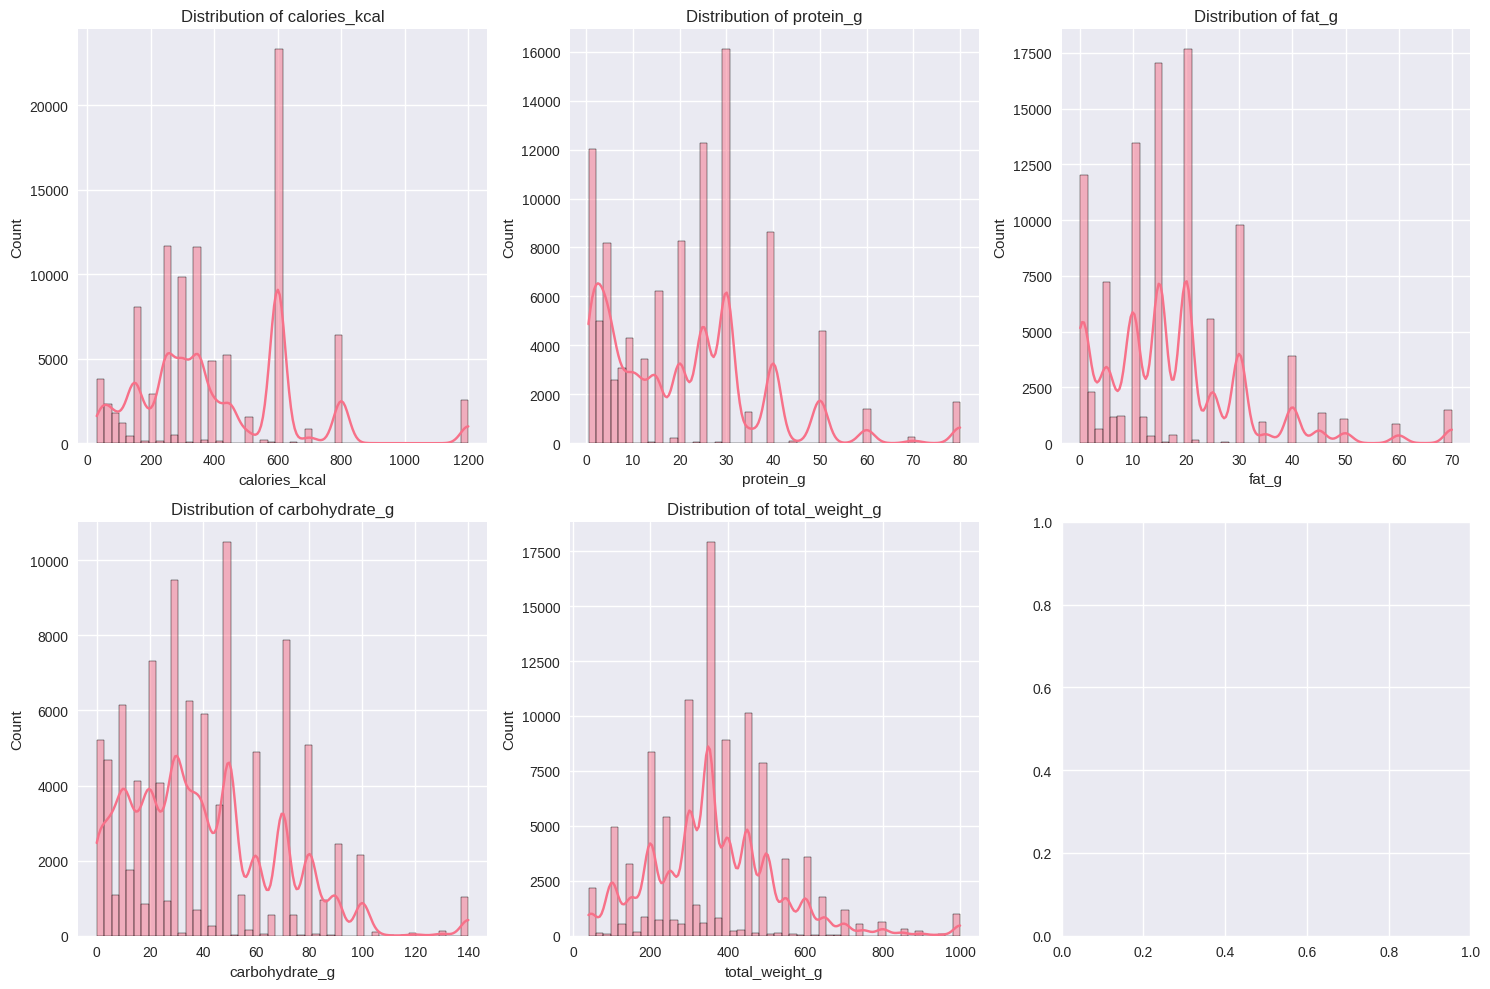

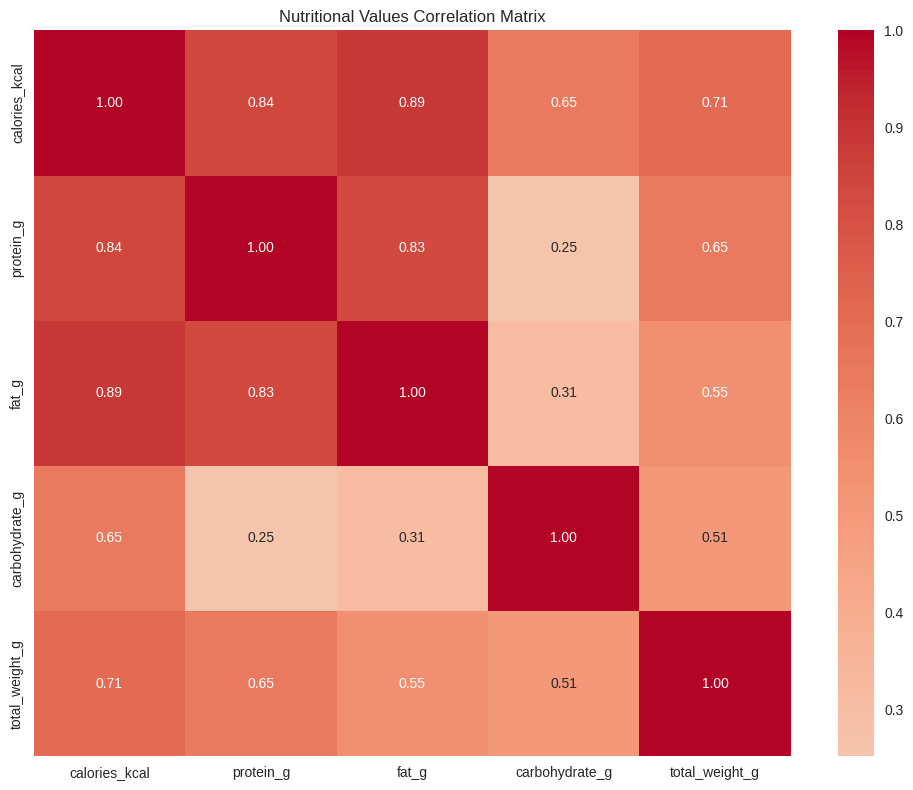

Analyzing ingredient networks...
Total unique ingredients: 3499
Total ingredient instances: 353774

Top 20 ingredients:
  vegetables: 15138
  spices: 12275
  sauce: 11828
  noodles: 11619
  green onions: 11496
  chicken: 10569
  meat: 9573
  rice: 9306
  sugar: 8043
  beef: 7472
  soy sauce: 6929
  broth: 6666
  eg: 5874
  shrimp: 5690
  garlic: 5639
  oi: 5491
  flour: 5302
  pork: 4561
  carrots: 4288
  seasonin: 4094


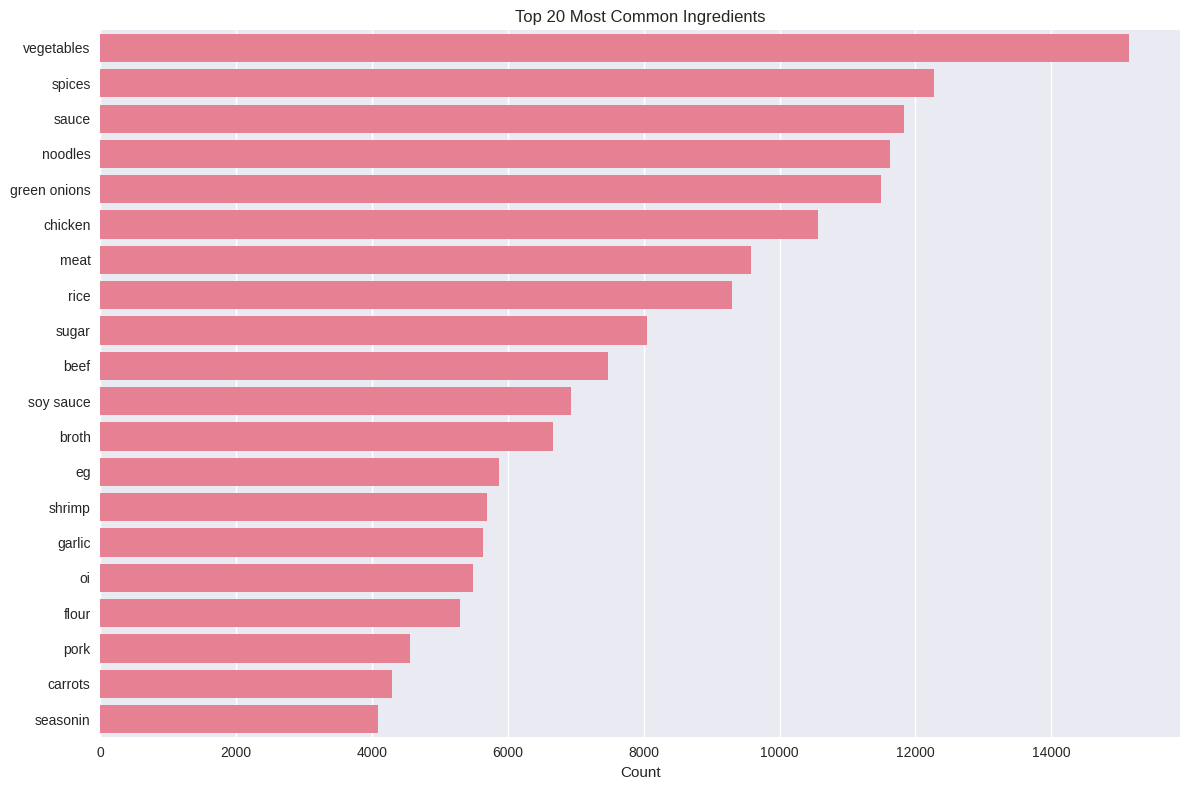

Analyzing cooking methods...
Total unique cooking methods: 1682
Total method instances: 100140

Top 15 cooking methods:
  raw: 11789
  stir-frying: 11217
  boiling: 7326
  fried: 6561
  baked: 4465
  boiled: 4298
  grilling: 4208
  stir-fried: 3525
  baking: 3280
  stewing: 1930
  steamed: 1914
  steaming: 1730
  braising: 1710
  boiled and stir-fried: 1673
  grilled: 1666


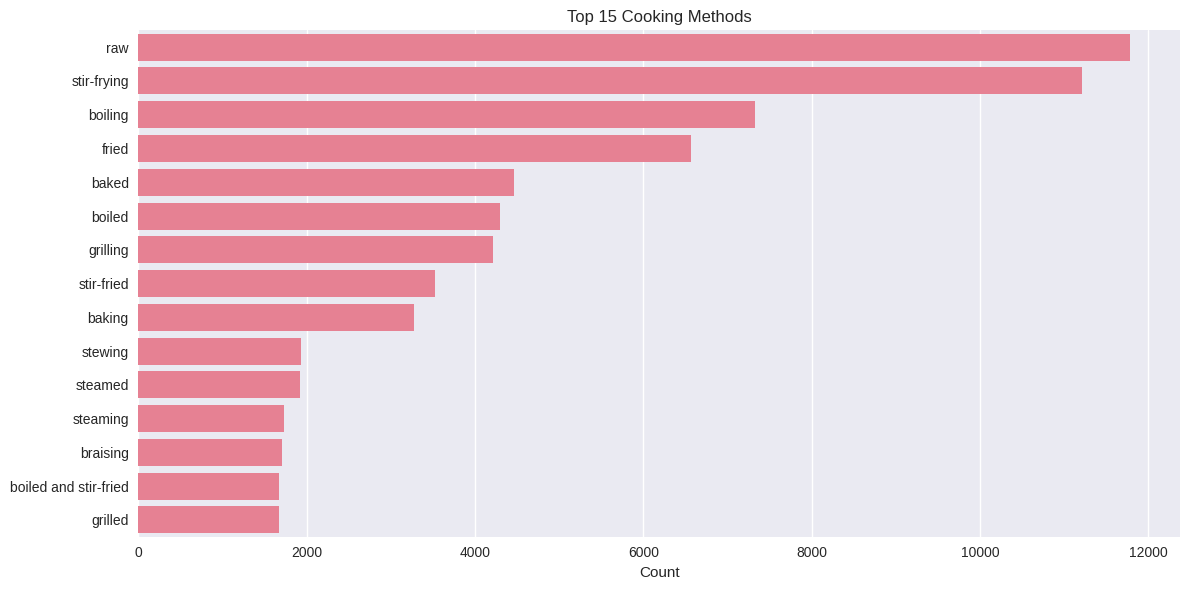

In [11]:
def comprehensive_eda_cleaned(df):
    """
    Comprehensive EDA using the cleaned dataset
    """
    print("="*60)
    print("COMPREHENSIVE EDA WITH CLEANED DATA")
    print("="*60)

    # Run modular EDA functions
    nutritional_corr = analyze_nutritional_patterns(df)
    ingredient_counts = analyze_ingredient_networks(df)
    method_counts, method_nutrition = analyze_cooking_methods(df)

    # Additional EDA (keep original code for other analyses)
    # ...

    return {
        'nutritional_corr': nutritional_corr,
        'ingredient_counts': ingredient_counts,
        'method_counts': method_counts,
        'method_nutrition': method_nutrition
    }

# Run comprehensive EDA
eda_results = comprehensive_eda_cleaned(df)

## 4.FEATURE ENGINEERING

Objective: Create informative features for machine learning
- Create nutrition-based features with clear rationale
- Create ingredient-based features efficiently
- Create cooking method features

In [12]:
# =============================================================================
# FEATURE ENGINEERING: NUTRITIONAL FEATURES
# Objective: Create nutrition-based features with clear rationale
# =============================================================================

def create_nutritional_features(df):
    """Create nutrition-based features with clear rationale"""
    print("Creating nutritional features...")

    # Make a copy to avoid modifying the original
    df = df.copy()

    # Calculate nutritional ratios
    df['protein_calorie_ratio'] = df['protein_g'] / df['calories_kcal']
    df['fat_calorie_ratio'] = df['fat_g'] / df['calories_kcal']
    df['carb_calorie_ratio'] = df['carbohydrate_g'] / df['calories_kcal']

    # Calculate macronutrient percentages
    total_macros = df['protein_g'] + df['fat_g'] + df['carbohydrate_g']
    df['protein_pct'] = df['protein_g'] / total_macros * 100
    df['fat_pct'] = df['fat_g'] / total_macros * 100
    df['carb_pct'] = df['carbohydrate_g'] / total_macros * 100

    # Energy density
    df['energy_density'] = df['calories_kcal'] / df['total_weight_g'].replace(0, 1)

    # Replace infinities with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    print("‚úì Nutritional features created")
    print(f"New columns: {['protein_calorie_ratio', 'fat_calorie_ratio', 'carb_calorie_ratio', 'protein_pct', 'fat_pct', 'carb_pct', 'energy_density']}")

    return df

# Apply nutritional feature engineering
df = create_nutritional_features(df)

Creating nutritional features...
‚úì Nutritional features created
New columns: ['protein_calorie_ratio', 'fat_calorie_ratio', 'carb_calorie_ratio', 'protein_pct', 'fat_pct', 'carb_pct', 'energy_density']


In [13]:
# =============================================================================
# FEATURE ENGINEERING: INGREDIENT FEATURES
# Objective: Create ingredient-based features efficiently
# =============================================================================

def create_ingredient_features(df):
    """Create ingredient-based features efficiently"""
    print("Creating ingredient features...")

    # Make a copy to avoid modifying the original
    df = df.copy()

    # Count ingredients
    df['num_ingredients'] = df['ingredients_cleaned'].apply(len)

    # Flag for common dietary patterns
    vegan_restricted = ['meat', 'chicken', 'beef', 'pork', 'fish', 'seafood', 'egg',
                       'dairy', 'milk', 'cheese', 'butter', 'honey', 'gelatin']
    vegetarian_restricted = ['meat', 'beef', 'pork', 'chicken', 'fish', 'seafood']
    gluten_restricted = ['wheat', 'barley', 'rye', 'bread', 'pasta', 'cereal', 'couscous']

    def check_diet_compliance(ingredients, restricted_items):
        if not isinstance(ingredients, list):
            return False
        ingredient_text = ' '.join([str(ing).lower() for ing in ingredients])
        return not any(item in ingredient_text for item in restricted_items)

    df['is_vegan'] = df['ingredients_cleaned'].apply(
        lambda x: check_diet_compliance(x, vegan_restricted)
    )
    df['is_vegetarian'] = df['ingredients_cleaned'].apply(
        lambda x: check_diet_compliance(x, vegetarian_restricted)
    )
    df['is_gluten_free'] = df['ingredients_cleaned'].apply(
        lambda x: check_diet_compliance(x, gluten_restricted)
    )

    print("‚úì Ingredient features created")
    print(f"New columns: {['num_ingredients', 'is_vegan', 'is_vegetarian', 'is_gluten_free']}")

    return df

# Apply ingredient feature engineering
df = create_ingredient_features(df)

Creating ingredient features...
‚úì Ingredient features created
New columns: ['num_ingredients', 'is_vegan', 'is_vegetarian', 'is_gluten_free']


In [14]:
# =============================================================================
# FEATURE ENGINEERING: COOKING FEATURES
# Objective: Create cooking method features
# =============================================================================

def create_cooking_features(df):
    """Create cooking method features"""
    print("Creating cooking features...")

    # Make a copy to avoid modifying the original
    df = df.copy()

    # Count cooking methods
    df['num_cooking_methods'] = df['cooking_methods_cleaned'].apply(len)

    # Flag for common cooking techniques
    healthy_methods = ['steam', 'boil', 'bake', 'grill', 'roast']
    unhealthy_methods = ['fry', 'deep fry', 'pan fry']

    def count_cooking_types(methods, method_list):
        if not isinstance(methods, list):
            return 0
        return sum(1 for method in methods if method in method_list)

    df['healthy_cooking_count'] = df['cooking_methods_cleaned'].apply(
        lambda x: count_cooking_types(x, healthy_methods)
    )
    df['unhealthy_cooking_count'] = df['cooking_methods_cleaned'].apply(
        lambda x: count_cooking_types(x, unhealthy_methods)
    )

    print("‚úì Cooking features created")
    print(f"New columns: {['num_cooking_methods', 'healthy_cooking_count', 'unhealthy_cooking_count']}")

    return df

# Apply cooking feature engineering
df = create_cooking_features(df)

Creating cooking features...
‚úì Cooking features created
New columns: ['num_cooking_methods', 'healthy_cooking_count', 'unhealthy_cooking_count']


Analyzing feature importance for target: calories_kcal
Using 19 numeric features for importance analysis


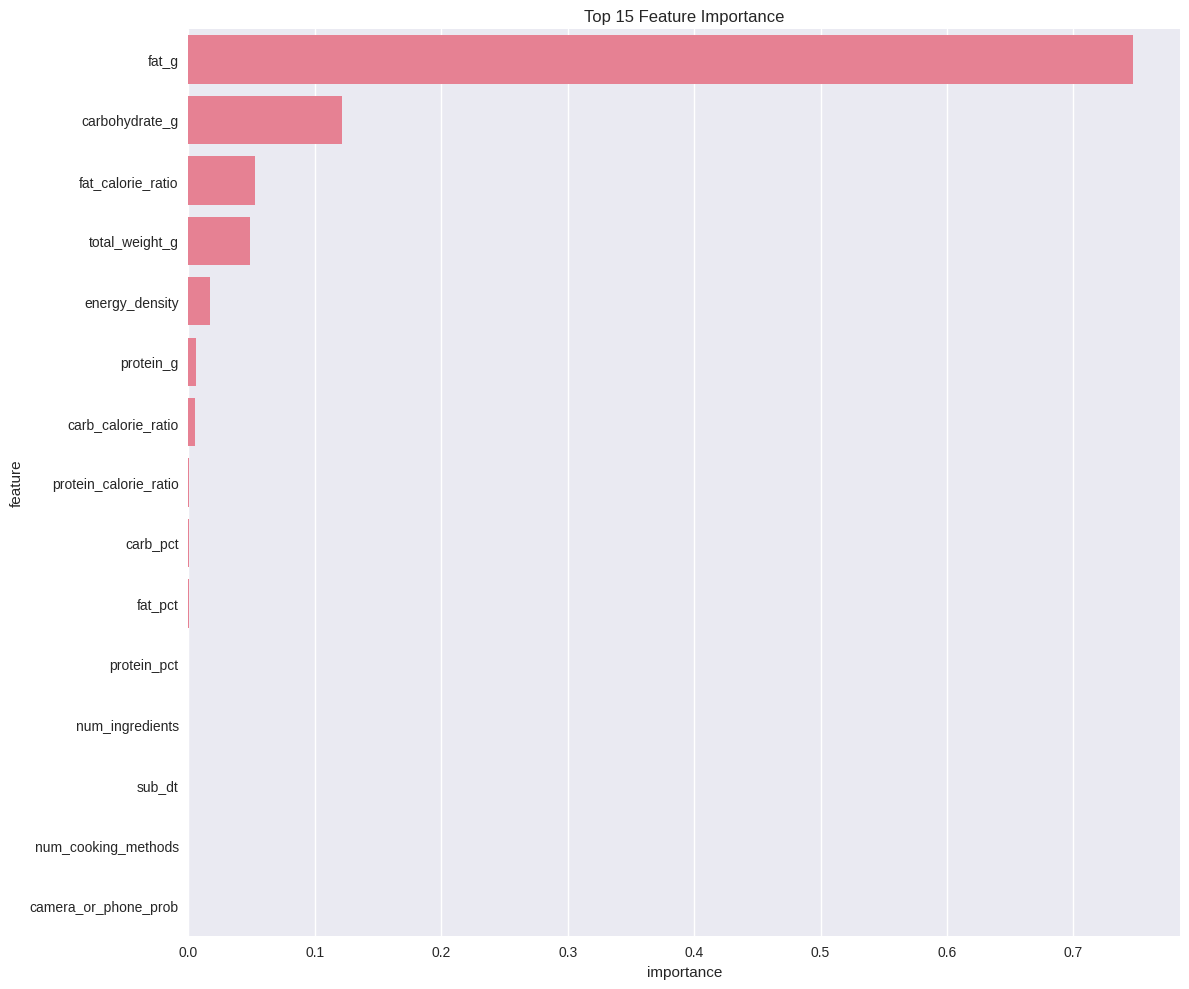

Top 10 most important features:
  2. fat_g: 0.7470
  3. carbohydrate_g: 0.1215
  10. fat_calorie_ratio: 0.0525
  4. total_weight_g: 0.0489
  15. energy_density: 0.0167
  1. protein_g: 0.0063
  11. carb_calorie_ratio: 0.0054
  9. protein_calorie_ratio: 0.0008
  14. carb_pct: 0.0006
  13. fat_pct: 0.0002


In [15]:
# =============================================================================
# FEATURE ENGINEERING: FEATURE IMPORTANCE ANALYSIS
# Objective: Analyze which features matter most
# =============================================================================

def analyze_feature_importance(df, target_col='calories_kcal'):
    """Analyze which features matter most"""
    from sklearn.ensemble import RandomForestRegressor

    print(f"Analyzing feature importance for target: {target_col}")

    # Select numeric features
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)

    print(f"Using {len(numeric_cols)} numeric features for importance analysis")

    # Prepare data
    X = df[numeric_cols].fillna(0)
    y = df[target_col].fillna(0)

    # Train simple model for feature importance
    model = RandomForestRegressor(n_estimators=50, random_state=42)
    model.fit(X, y)

    # Get feature importance
    importance = pd.DataFrame({
        'feature': numeric_cols,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 10))
    sns.barplot(x='importance', y='feature', data=importance.head(15))
    plt.title('Top 15 Feature Importance')
    plt.tight_layout()
    plt.show()

    # Display top features
    print("Top 10 most important features:")
    for i, row in importance.head(10).iterrows():
        print(f"  {i+1}. {row['feature']}: {row['importance']:.4f}")

    return importance

# Analyze feature importance
feature_importance = analyze_feature_importance(df)

In [16]:
# =============================================================================
# COMPREHENSIVE FEATURE ENGINEERING
# Objective: Apply all feature engineering steps
# =============================================================================

def comprehensive_feature_engineering(df):
    """Apply all feature engineering steps"""
    print("="*60)
    print("COMPREHENSIVE FEATURE ENGINEERING")
    print("="*60)

    # Track original columns
    original_columns = set(df.columns)

    # Apply all feature engineering steps
    df = create_nutritional_features(df)
    df = create_ingredient_features(df)
    df = create_cooking_features(df)

    # Identify new columns
    new_columns = set(df.columns) - original_columns
    print(f"\n‚úì Feature engineering complete!")
    print(f"Added {len(new_columns)} new features: {list(new_columns)}")

    return df

# Apply comprehensive feature engineering
df = comprehensive_feature_engineering(df)

COMPREHENSIVE FEATURE ENGINEERING
Creating nutritional features...
‚úì Nutritional features created
New columns: ['protein_calorie_ratio', 'fat_calorie_ratio', 'carb_calorie_ratio', 'protein_pct', 'fat_pct', 'carb_pct', 'energy_density']
Creating ingredient features...
‚úì Ingredient features created
New columns: ['num_ingredients', 'is_vegan', 'is_vegetarian', 'is_gluten_free']
Creating cooking features...
‚úì Cooking features created
New columns: ['num_cooking_methods', 'healthy_cooking_count', 'unhealthy_cooking_count']

‚úì Feature engineering complete!
Added 0 new features: []


In [17]:
# =============================================================================
# FEATURE SUMMARY
# Objective: Display summary of all features
# =============================================================================

def display_feature_summary(df):
    """Display summary of all features"""
    print("="*60)
    print("FEATURE SUMMARY")
    print("="*60)

    # Count features by type
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
    list_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).any()]

    print(f"Total features: {len(df.columns)}")
    print(f"Numeric features: {len(numeric_cols)}")
    print(f"Categorical features: {len(categorical_cols)}")
    print(f"Boolean features: {len(bool_cols)}")
    print(f"List features: {len(list_cols)}")

    # Show sample of each feature type
    print(f"\nSample numeric features: {numeric_cols[:5]}")
    print(f"Sample categorical features: {categorical_cols[:5]}")
    print(f"Sample boolean features: {bool_cols}")
    print(f"Sample list features: {list_cols}")

    # Show missing values
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    print(f"\nFeatures with missing values: {len(missing_values[missing_values > 0])}")
    if len(missing_values[missing_values > 0]) > 0:
        print("Top features with missing values:")
        for col, count in missing_values[missing_values > 0].sort_values(ascending=False).head(5).items():
            print(f"  {col}: {count} ({missing_percent[col]:.1f}%)")

# Display feature summary
display_feature_summary(df)

FEATURE SUMMARY
Total features: 33
Numeric features: 20
Categorical features: 6
Boolean features: 7
List features: 3

Sample numeric features: ['calories_kcal', 'protein_g', 'fat_g', 'carbohydrate_g', 'total_weight_g']
Sample categorical features: ['dish_name', 'food_type_standardized', 'ingredients_cleaned', 'cooking_methods_cleaned', 'portion_weights']
Sample boolean features: ['has_nutrition_data', 'has_ingredients', 'has_cooking_methods', 'has_portion_data', 'is_vegan', 'is_vegetarian', 'is_gluten_free']
Sample list features: ['ingredients_cleaned', 'cooking_methods_cleaned', 'portion_weights']

Features with missing values: 0


## 5.MACHINE LEARNING PIPELINE

Objective: Build and evaluate predictive models
- Prepare features and targets with proper validation
- Train simple baseline models for comparison
- Train more sophisticated models
- Comprehensive model evaluation with multiple metrics

In [18]:
# =============================================================================
# ML PIPELINE: DATA PREPARATION
# Objective: Prepare features and targets with proper validation
# =============================================================================

def prepare_ml_data(df, target_col='calories_kcal', test_size=0.2, random_state=42):
    """Prepare features and targets with proper validation"""
    print("Preparing data for modeling...")

    # Select numeric features
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)

    print(f"Using {len(numeric_cols)} numeric features for modeling")
    print(f"Target variable: {target_col}")

    # Prepare features and target
    X = df[numeric_cols].fillna(0)
    y = df[target_col].fillna(0)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Store results in a dictionary
    ml_data = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test,
        'scaler': scaler,
        'feature_names': numeric_cols,
        'target_col': target_col
    }

    print("‚úì Data preparation complete!")
    return ml_data

# Prepare the data
ml_data = prepare_ml_data(df, target_col='calories_kcal')

Preparing data for modeling...
Using 19 numeric features for modeling
Target variable: calories_kcal
Training set: 80000 samples
Test set: 20000 samples
‚úì Data preparation complete!


In [19]:
# =============================================================================
# ML PIPELINE: BASELINE MODELS
# Objective: Train simple baseline models for comparison
# =============================================================================

def train_baseline_models(ml_data):
    """Train simple baseline models for comparison"""
    print("Training baseline models...")

    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    X_train, X_test, y_train, y_test = ml_data['X_train'], ml_data['X_test'], ml_data['y_train'], ml_data['y_test']
    models = {}

    # Linear Regression
    print("Training Linear Regression...")
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)

    lr_metrics = {
        'mae': mean_absolute_error(y_test, lr_pred),
        'mse': mean_squared_error(y_test, lr_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, lr_pred)),
        'r2': r2_score(y_test, lr_pred)
    }

    models['Linear Regression'] = {'model': lr, 'metrics': lr_metrics}
    print(f"  Linear Regression R¬≤: {lr_metrics['r2']:.4f}")

    # Random Forest
    print("Training Random Forest...")
    rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)

    rf_metrics = {
        'mae': mean_absolute_error(y_test, rf_pred),
        'mse': mean_squared_error(y_test, rf_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, rf_pred)),
        'r2': r2_score(y_test, rf_pred)
    }

    models['Random Forest'] = {'model': rf, 'metrics': rf_metrics}
    print(f"  Random Forest R¬≤: {rf_metrics['r2']:.4f}")

    # Add models to ml_data
    ml_data['models'] = models
    ml_data['baseline_models'] = list(models.keys())

    print("Baseline models training complete!")
    return ml_data

# Train baseline models
ml_data = train_baseline_models(ml_data)

Training baseline models...
Training Linear Regression...
  Linear Regression R¬≤: 0.9917
Training Random Forest...
  Random Forest R¬≤: 0.9995
Baseline models training complete!


In [20]:
# =============================================================================
# ML PIPELINE: ADVANCED MODELS
# Objective: Train more sophisticated models
# =============================================================================

def train_advanced_models(ml_data):
    """Train more sophisticated models"""
    print("Training advanced models...")

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    X_train, X_test, y_train, y_test = ml_data['X_train'], ml_data['X_test'], ml_data['y_train'], ml_data['y_test']

    # XGBoost if available
    if XGB_AVAILABLE:
        print("Training XGBoost...")
        xgb_model = xgb.XGBRegressor(n_estimators=50, random_state=42)
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict(X_test)

        xgb_metrics = {
            'mae': mean_absolute_error(y_test, xgb_pred),
            'mse': mean_squared_error(y_test, xgb_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, xgb_pred)),
            'r2': r2_score(y_test, xgb_pred)
        }

        ml_data['models']['XGBoost'] = {'model': xgb_model, 'metrics': xgb_metrics}
        print(f"  XGBoost R¬≤: {xgb_metrics['r2']:.4f}")
    else:
        print("XGBoost not available. Install with: pip install xgboost")

    print("‚úì Advanced models training complete!")
    return ml_data

# Train advanced models
ml_data = train_advanced_models(ml_data)

Training advanced models...
Training XGBoost...
  XGBoost R¬≤: 0.9992
‚úì Advanced models training complete!


Evaluating models...
Model Performance Comparison:
            Model  R¬≤ Score       MAE      RMSE
    Random Forest  0.999490  0.342758  5.411900
          XGBoost  0.999225  2.467626  6.673053
Linear Regression  0.991704 12.171671 21.830991

Best model: Random Forest (R¬≤: 0.9995)


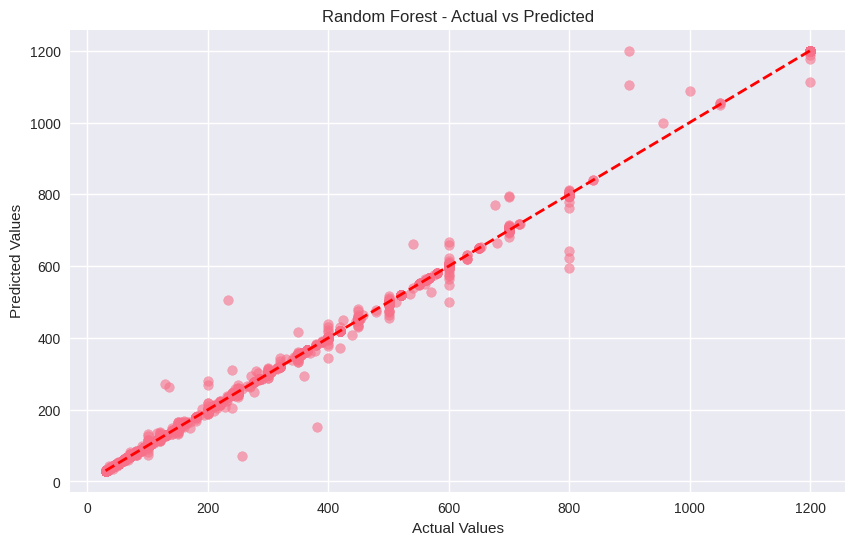

‚úì Model evaluation complete!


In [21]:
# =============================================================================
# ML PIPELINE: MODEL EVALUATION
# Objective: Comprehensive model evaluation with multiple metrics
# =============================================================================

def evaluate_models(ml_data):
    """Comprehensive model evaluation with multiple metrics"""
    print("Evaluating models...")

    # Create comparison table
    comparison_data = []
    for name, result in ml_data['models'].items():
        comparison_data.append({
            'Model': name,
            'R¬≤ Score': result['metrics']['r2'],
            'MAE': result['metrics']['mae'],
            'RMSE': result['metrics']['rmse']
        })

    comparison_df = pd.DataFrame(comparison_data).sort_values('R¬≤ Score', ascending=False)
    print("Model Performance Comparison:")
    print(comparison_df.to_string(index=False))

    # Find best model
    best_model_name = comparison_df.iloc[0]['Model']
    best_model = ml_data['models'][best_model_name]['model']
    best_metrics = ml_data['models'][best_model_name]['metrics']

    print(f"\nBest model: {best_model_name} (R¬≤: {best_metrics['r2']:.4f})")

    # Plot predictions vs actual
    best_predictions = best_model.predict(ml_data['X_test'])

    plt.figure(figsize=(10, 6))
    plt.scatter(ml_data['y_test'], best_predictions, alpha=0.6)
    plt.plot([ml_data['y_test'].min(), ml_data['y_test'].max()],
             [ml_data['y_test'].min(), ml_data['y_test'].max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{best_model_name} - Actual vs Predicted')
    plt.show()

    # Add to ml_data
    ml_data['comparison_df'] = comparison_df
    ml_data['best_model_name'] = best_model_name
    ml_data['best_model'] = best_model
    ml_data['best_metrics'] = best_metrics

    print("‚úì Model evaluation complete!")
    return ml_data

# Evaluate models
ml_data = evaluate_models(ml_data)

COMPREHENSIVE MACHINE LEARNING PIPELINE
Preparing data for modeling...
Using 19 numeric features for modeling
Target variable: calories_kcal
Training set: 80000 samples
Test set: 20000 samples
‚úì Data preparation complete!
Training baseline models...
Training Linear Regression...
  Linear Regression R¬≤: 0.9917
Training Random Forest...
  Random Forest R¬≤: 0.9995
Baseline models training complete!
Training advanced models...
Training XGBoost...
  XGBoost R¬≤: 0.9992
‚úì Advanced models training complete!
Evaluating models...
Model Performance Comparison:
            Model  R¬≤ Score       MAE      RMSE
    Random Forest  0.999490  0.342758  5.411900
          XGBoost  0.999225  2.467626  6.673053
Linear Regression  0.991704 12.171671 21.830991

Best model: Random Forest (R¬≤: 0.9995)


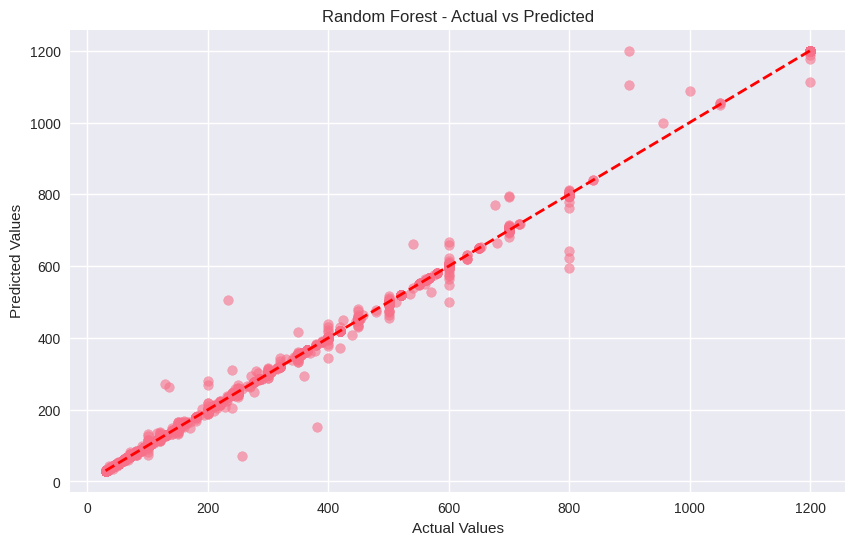

‚úì Model evaluation complete!

PIPELINE COMPLETE - FINAL RESULTS
Best Model: Random Forest
R¬≤ Score: 0.9995
MAE: 0.34
RMSE: 5.41

Models trained: ['Linear Regression', 'Random Forest', 'XGBoost']
Features used: 19


In [24]:
# =============================================================================
# COMPREHENSIVE ML PIPELINE
# Objective: Run complete machine learning pipeline
# =============================================================================

def run_comprehensive_ml_pipeline(df, target_col='calories_kcal'):
    """Run complete machine learning pipeline"""
    print("="*60)
    print("COMPREHENSIVE MACHINE LEARNING PIPELINE")
    print("="*60)

    # Run all steps
    ml_data = prepare_ml_data(df, target_col=target_col)
    ml_data = train_baseline_models(ml_data)
    ml_data = train_advanced_models(ml_data)
    ml_data = evaluate_models(ml_data)
    # ml_data = analyze_model_feature_importance(ml_data) # Removed undefined function call

    # Display final results
    print("\n" + "="*60)
    print("PIPELINE COMPLETE - FINAL RESULTS")
    print("="*60)

    best_model_name = ml_data['best_model_name']
    best_metrics = ml_data['best_metrics']

    print(f"Best Model: {best_model_name}")
    print(f"R¬≤ Score: {best_metrics['r2']:.4f}")
    print(f"MAE: {best_metrics['mae']:.2f}")
    print(f"RMSE: {best_metrics['rmse']:.2f}")

    print(f"\nModels trained: {list(ml_data['models'].keys())}")
    print(f"Features used: {len(ml_data['feature_names'])}")

    return ml_data

# Run comprehensive ML pipeline
ml_results = run_comprehensive_ml_pipeline(df, target_col='calories_kcal')

## 6.RECOMMENDATION SYSTEM
Objective: Build intelligent recipe recommendation engine
- Improved content-based filtering
- Add collaborative filtering capabilities
- Combine multiple recommendation approaches

### method 1 (old)
**working**

In [25]:
class EfficientNutritionalRecommender:
    """
    Memory-efficient recommendation system that won't crash Colab
    """

    def __init__(self, df, max_samples=100000, max_ingredients=500):
        """
        Initialize with memory constraints

        Args:
            df: DataFrame with recipe data
            max_samples: Maximum number of recipes to use (prevents memory issues)
            max_ingredients: Maximum ingredients to consider for similarity
        """
        print(f"Initializing Efficient Recommendation System...")

        # Sample data to prevent memory issues
        if len(df) > max_samples:
            print(f"Sampling {max_samples} recipes from {len(df)} total recipes")
            self.df = df.sample(n=max_samples, random_state=42).reset_index(drop=True)
        else:
            self.df = df.copy().reset_index(drop=True)

        self.max_ingredients = max_ingredients
        self._prepare_efficient_features()
        print(f"Recommender initialized with {len(self.df)} recipes")

    def _prepare_efficient_features(self):
        """Prepare lightweight features instead of full one-hot encoding"""
        # Get top ingredients only (limits feature space dramatically)
        all_ingredients = []
        for ingredients in self.df['ingredients_cleaned']:
            if isinstance(ingredients, list):
                all_ingredients.extend([ing.lower().strip() for ing in ingredients])

        from collections import Counter
        ingredient_counter = Counter(all_ingredients)
        self.top_ingredients = [ing for ing, count in ingredient_counter.most_common(self.max_ingredients)]

        print(f"Using top {len(self.top_ingredients)} ingredients for recommendations")

        # Create simple dietary flags
        self._create_dietary_flags()

        # Pre-calculate nutritional scores
        self._calculate_nutritional_scores()

    def _create_dietary_flags(self):
        """Create dietary restriction flags efficiently"""
        dietary_restrictions = {
            'vegan_restricted': ['meat', 'beef', 'pork', 'chicken', 'fish', 'seafood', 'shrimp',
                   'salmon', 'tuna', 'crab', 'lobster', 'egg', 'dairy', 'milk',
                   'cheese', 'butter', 'honey', 'gelatin'],
            'vegetarian_restricted': ['meat', 'beef', 'pork', 'chicken', 'fish', 'seafood'],
            'keto_friendly': ['low carb', 'sugar free', 'keto'],
            'gluten_restricted': ['wheat', 'flour', 'bread', 'pasta', 'gluten']
        }

        '''def check_dietary_compliance(ingredients, restricted_items):
            if not isinstance(ingredients, list):
                return False
            ingredient_text = ' '.join([str(ing).lower() for ing in ingredients])
            return not any(item in ingredient_text for item in restricted_items)'''

        def check_dietary_compliance(ingredients, restricted_items):
          if not isinstance(ingredients, list) or not ingredients:
            return True
          ingredient_text = ' '.join([str(ing).lower() for ing in ingredients])
          return not any(item in ingredient_text for item in restricted_items)

        # Create flags
        self.df['is_vegan'] = self.df['ingredients_cleaned'].apply(
            lambda x: check_dietary_compliance(x, dietary_restrictions['vegan_restricted'])
        )
        self.df['is_vegetarian'] = self.df['ingredients_cleaned'].apply(
            lambda x: check_dietary_compliance(x, dietary_restrictions['vegetarian_restricted'])
        )
        self.df['is_gluten_free'] = self.df['ingredients_cleaned'].apply(
            lambda x: check_dietary_compliance(x, dietary_restrictions['gluten_restricted'])
        )

        # High protein flag
        self.df['is_high_protein'] = self.df['protein_g'] > self.df['protein_g'].quantile(0.7)

        # Low calorie flag
        self.df['is_low_calorie'] = self.df['calories_kcal'] < self.df['calories_kcal'].quantile(0.3)

    def _calculate_nutritional_scores(self):
        """Pre-calculate scoring metrics"""
        # Nutritional density score
        if 'nutritional_density' not in self.df.columns:
            self.df['nutritional_density'] = (
                self.df['protein_g'] / self.df['calories_kcal'] * 100
            ).fillna(0)

        # Health score based on multiple factors
        self.df['health_score'] = (
            (self.df['protein_g'] / self.df['calories_kcal'] * 10).fillna(0) +
            self.df['is_high_protein'].astype(int) * 2 +
            self.df['is_low_calorie'].astype(int) * 1
        )

    def recommend_by_diet(self, diet_type, n_recommendations=5, **filters):
        """
        Efficient diet-based recommendations
        """
        diet_filters = {
            'vegan': 'is_vegan',
            'vegetarian': 'is_vegetarian',
            'gluten_free': 'is_gluten_free',
            'high_protein': 'is_high_protein',
            'low_calorie': 'is_low_calorie'
        }

        if diet_type not in diet_filters:
            available_diets = list(diet_filters.keys())
            print(f"Diet type '{diet_type}' not supported. Available: {available_diets}")
            return None

        # Filter by diet
        diet_column = diet_filters[diet_type]
        filtered_df = self.df[self.df[diet_column] == True].copy()

        if len(filtered_df) == 0:
            print(f"No {diet_type} recipes found")
            return self._get_fallback_recommendations(n_recommendations)

        # Apply additional filters
        filtered_df = self._apply_filters(filtered_df, **filters)

        if len(filtered_df) == 0:
            print(f"No {diet_type} recipes match your criteria")
            return self._get_fallback_recommendations(n_recommendations)

        # Sort by health score and nutritional density
        recommendations = filtered_df.nlargest(n_recommendations, ['health_score', 'nutritional_density'])

        return self._format_recommendations(recommendations, f"{diet_type.title()} Recommendations")

    def recommend_by_ingredients(self, preferred_ingredients, excluded_ingredients=None, n_recommendations=5, **filters):
        """
        Efficient ingredient-based recommendations
        """
        if excluded_ingredients is None:
            excluded_ingredients = []

        preferred_ingredients = [ing.lower().strip() for ing in preferred_ingredients]
        excluded_ingredients = [ing.lower().strip() for ing in excluded_ingredients]

        # Score recipes by ingredient matches
        def calculate_ingredient_score(ingredients):
            if not isinstance(ingredients, list):
                return 0

            ingredient_text = ' '.join([str(ing).lower() for ing in ingredients])

            # Calculate preference score
            preference_score = sum(2 for pref in preferred_ingredients if pref in ingredient_text)

            # Penalize for excluded ingredients
            exclusion_penalty = sum(5 for excl in excluded_ingredients if excl in ingredient_text)

            return max(0, preference_score - exclusion_penalty)

        self.df['ingredient_score'] = self.df['ingredients_cleaned'].apply(calculate_ingredient_score)

        # Get recipes with positive scores
        filtered_df = self.df[self.df['ingredient_score'] > 0].copy()

        if len(filtered_df) == 0:
            print("No recipes found matching your ingredient preferences")
            return self._get_fallback_recommendations(n_recommendations)

        # Apply additional filters
        filtered_df = self._apply_filters(filtered_df, **filters)

        if len(filtered_df) == 0:
            print("No recipes match your ingredient preferences and filters")
            return self._get_fallback_recommendations(n_recommendations)

        # Sort by ingredient score and health score
        recommendations = filtered_df.nlargest(n_recommendations, ['ingredient_score', 'health_score'])

        return self._format_recommendations(recommendations, "Ingredient-Based Recommendations")

    def recommend_by_nutrition_goals(self, goal, target_calories=None, n_recommendations=5, **filters):
        """
        Nutrition goal-based recommendations
        """
        goal_configs = {
            'weight_loss': {
                'max_calories': 400,
                'min_protein': 15,
                'sort_by': ['is_low_calorie', 'health_score'],
                'ascending': [False, False]
            },
            'muscle_gain': {
                'min_protein': 20,
                'min_calories': 300,
                'sort_by': ['is_high_protein', 'protein_g'],
                'ascending': [False, False]
            },
            'healthy_eating': {
                'min_protein': 10,
                'sort_by': ['health_score', 'nutritional_density'],
                'ascending': [False, False]
            }
        }

        if goal not in goal_configs:
            available_goals = list(goal_configs.keys())
            print(f"Goal '{goal}' not supported. Available: {available_goals}")
            return None

        config = goal_configs[goal]
        filtered_df = self.df.copy()

        # Apply goal-specific filters
        if 'max_calories' in config:
            filtered_df = filtered_df[filtered_df['calories_kcal'] <= config['max_calories']]

        if 'min_calories' in config:
            filtered_df = filtered_df[filtered_df['calories_kcal'] >= config['min_calories']]

        if 'min_protein' in config:
            filtered_df = filtered_df[filtered_df['protein_g'] >= config['min_protein']]

        # Apply target calories if specified
        if target_calories:
            calorie_range = target_calories * 0.2  # 20% tolerance
            filtered_df = filtered_df[
                (filtered_df['calories_kcal'] >= target_calories - calorie_range) &
                (filtered_df['calories_kcal'] <= target_calories + calorie_range)
            ]

        # Apply additional filters
        filtered_df = self._apply_filters(filtered_df, **filters)

        if len(filtered_df) == 0:
            print(f"No recipes found for {goal} goal")
            return self._get_fallback_recommendations(n_recommendations)

        # Sort according to goal configuration
        recommendations = filtered_df.sort_values(
            config['sort_by'],
            ascending=config['ascending']
        ).head(n_recommendations)

        return self._format_recommendations(recommendations, f"{goal.replace('_', ' ').title()} Recommendations")

    def recommend_similar_recipes(self, recipe_index, n_recommendations=5, **filters):
        """
        Find similar recipes using simplified similarity calculation
        """
        if recipe_index >= len(self.df) or recipe_index < 0:
            print("Invalid recipe index")
            return None

        target_recipe = self.df.iloc[recipe_index]

        # Calculate simple similarity based on nutritional profile
        def calculate_similarity(row):
            # Nutritional similarity (normalized)
            nutrition_diff = abs(
                (row['calories_kcal'] - target_recipe['calories_kcal']) / max(target_recipe['calories_kcal'], 1) +
                (row['protein_g'] - target_recipe['protein_g']) / max(target_recipe['protein_g'], 1) +
                (row['fat_g'] - target_recipe['fat_g']) / max(target_recipe['fat_g'], 1)
            )

            # Ingredient overlap (simplified)
            if isinstance(row['ingredients_cleaned'], list) and isinstance(target_recipe['ingredients_cleaned'], list):
                target_ingredients = set([ing.lower() for ing in target_recipe['ingredients_cleaned']])
                recipe_ingredients = set([ing.lower() for ing in row['ingredients_cleaned']])

                if len(target_ingredients) > 0:
                    ingredient_overlap = len(target_ingredients.intersection(recipe_ingredients)) / len(target_ingredients)
                else:
                    ingredient_overlap = 0
            else:
                ingredient_overlap = 0

            # Combined similarity (lower is more similar)
            return nutrition_diff - (ingredient_overlap * 0.5)

        # Calculate similarities
        similarities = self.df.apply(calculate_similarity, axis=1)

        # Get most similar recipes (excluding the target recipe itself)
        similar_indices = similarities.nsmallest(n_recommendations + 1).index[1:]  # Skip first (self)
        similar_recipes = self.df.loc[similar_indices].copy()

        # Apply additional filters
        similar_recipes = self._apply_filters(similar_recipes, **filters)

        if len(similar_recipes) == 0:
            print("No similar recipes found matching your criteria")
            return self._get_fallback_recommendations(n_recommendations)

        return self._format_recommendations(similar_recipes.head(n_recommendations), "Similar Recipes")

    def _apply_filters(self, df, **filters):
        """Apply additional filters efficiently"""
        filtered_df = df.copy()

        # Calorie filters
        if 'min_calories' in filters:
            filtered_df = filtered_df[filtered_df['calories_kcal'] >= filters['min_calories']]
        if 'max_calories' in filters:
            filtered_df = filtered_df[filtered_df['calories_kcal'] <= filters['max_calories']]

        # Protein filters
        if 'min_protein' in filters:
            filtered_df = filtered_df[filtered_df['protein_g'] >= filters['min_protein']]
        if 'max_protein' in filters:
            filtered_df = filtered_df[filtered_df['protein_g'] <= filters['max_protein']]

        # Food type filter
        if 'food_type' in filters and 'food_type_standardized' in filtered_df.columns:
            filtered_df = filtered_df[filtered_df['food_type_standardized'] == filters['food_type']]

        return filtered_df

    def _get_fallback_recommendations(self, n_recommendations):
        """Provide fallback recommendations"""
        print("Showing general healthy recommendations as fallback")
        fallback = self.df.nlargest(n_recommendations, 'health_score')
        return self._format_recommendations(fallback, "General Recommendations (Fallback)")

    def _format_recommendations(self, recommendations, title):
        """Format recommendations for display"""
        results = []

        for idx, (_, recipe) in enumerate(recommendations.iterrows()):
            result = {
                'rank': idx + 1,
                'recipe_id': recipe.name,
                'name': recipe.get('dish_name', 'Unknown Dish'),
                'calories': round(recipe.get('calories_kcal', 0), 1),
                'protein': round(recipe.get('protein_g', 0), 1),
                'carbs': round(recipe.get('carbohydrate_g', 0), 1),
                'fat': round(recipe.get('fat_g', 0), 1),
                'health_score': round(recipe.get('health_score', 0), 2),
                'ingredients': recipe.get('ingredients_cleaned', [])[:5],  # First 5 ingredients
                'cooking_methods': recipe.get('cooking_methods_cleaned', []),
                'is_vegan': recipe.get('is_vegan', False),
                'is_vegetarian': recipe.get('is_vegetarian', False),
                'is_high_protein': recipe.get('is_high_protein', False)
            }
            results.append(result)

        return {
            'title': title,
            'count': len(results),
            'recommendations': results
        }

    def print_recommendations(self, recommendations):
        """Print recommendations in a readable format"""
        if not recommendations:
            print("No recommendations to display")
            return

        print(f"\n{'='*60}")
        print(f"{recommendations['title']}")
        print(f"{'='*60}")
        print(f"Found {recommendations['count']} recommendations\n")

        for rec in recommendations['recommendations']:
            print(f"{rec['rank']}. {rec['name']}")
            print(f"   Calories: {rec['calories']} kcal | Protein: {rec['protein']}g")
            print(f"   Carbs: {rec['carbs']}g | Fat: {rec['fat']}g")
            print(f"   Health Score: {rec['health_score']}")

            # Dietary flags
            flags = []
            if rec['is_vegan']: flags.append('Vegan')
            if rec['is_vegetarian']: flags.append('Vegetarian')
            if rec['is_high_protein']: flags.append('High Protein')
            if flags:
                print(f"   Tags: {', '.join(flags)}")

            print(f"   Ingredients: {', '.join(rec['ingredients'])}")
            if rec['cooking_methods']:
                print(f"   Cooking: {', '.join(rec['cooking_methods'])}")
            print()

# Demonstration function
def demonstrate_efficient_recommender(df):
    """Demonstrate the efficient recommender system"""
    print("Initializing Efficient Recommendation System...")

    try:
        # Initialize with reasonable sample size
        recommender = EfficientNutritionalRecommender(df, max_samples=25000, max_ingredients=200)

        print("\n" + "="*60)
        print("EFFICIENT RECOMMENDATION SYSTEM DEMO")
        print("="*60)

        # 1. Diet-based recommendations
        print("\n1. VEGAN RECOMMENDATIONS")
        vegan_recs = recommender.recommend_by_diet('vegan', n_recommendations=3)
        if vegan_recs:
            recommender.print_recommendations(vegan_recs)

        # 2. Ingredient-based recommendations
        print("\n2. CHICKEN-BASED RECIPES (excluding dairy)")
        ingredient_recs = recommender.recommend_by_ingredients(
            preferred_ingredients=['chicken', 'vegetable'],
            excluded_ingredients=['cheese', 'cream'],
            n_recommendations=3
        )
        if ingredient_recs:
            recommender.print_recommendations(ingredient_recs)

        # 3. Nutrition goal recommendations
        print("\n3. WEIGHT LOSS RECOMMENDATIONS")
        weight_loss_recs = recommender.recommend_by_nutrition_goals('weight_loss', n_recommendations=3)
        if weight_loss_recs:
            recommender.print_recommendations(weight_loss_recs)

        # 4. Similar recipes
        if len(recommender.df) > 0:
            print("\n4. RECIPES SIMILAR TO FIRST RECIPE")
            similar_recs = recommender.recommend_similar_recipes(0, n_recommendations=3)
            if similar_recs:
                recommender.print_recommendations(similar_recs)

        return recommender

    except Exception as e:
        print(f"Error in recommendation system: {str(e)}")
        print("This may be due to missing columns or data formatting issues")
        return None

recommender = demonstrate_efficient_recommender(df)



Initializing Efficient Recommendation System...
Initializing Efficient Recommendation System...
Sampling 25000 recipes from 100000 total recipes
Using top 200 ingredients for recommendations
Recommender initialized with 25000 recipes

EFFICIENT RECOMMENDATION SYSTEM DEMO

1. VEGAN RECOMMENDATIONS

Vegan Recommendations
Found 3 recommendations

1. boiled crustaceans
   Calories: 200 kcal | Protein: 40.0g
   Carbs: 0.0g | Fat: 2.0g
   Health Score: 5.0
   Tags: Vegan, Vegetarian, High Protein
   Ingredients: crustaceans
   Cooking: boiled

2. flounder
   Calories: 200 kcal | Protein: 40.0g
   Carbs: 0.0g | Fat: 5.0g
   Health Score: 5.0
   Tags: Vegan, Vegetarian, High Protein
   Ingredients: flounder
   Cooking: raw

3. seafood likely langoustines
   Calories: 200 kcal | Protein: 40.0g
   Carbs: 0.0g | Fat: 2.5g
   Health Score: 5.0
   Tags: Vegan, Vegetarian, High Protein
   Ingredients: langoustines
   Cooking: boiled or steamed


2. CHICKEN-BASED RECIPES (excluding dairy)

Ingredient

### method 1 - enhanced

In [26]:
import re
import json
import ast
import numpy as np
import pandas as pd
from collections import Counter
from PIL import Image
import requests
from io import BytesIO
from IPython.display import Image, display

# Define ProjectConfig class
class ProjectConfig:
    """Configuration class for project parameters."""
    def __init__(self):
        self.MAX_SAMPLES = 50000
        self.RANDOM_STATE = 42
        # Add other configuration parameters as needed

# Define FeatureEngineer class (based on the logic from section 4)
class FeatureEngineer:
    def __init__(self, config):
        self.config = config

    def create_nutritional_ratios(self, df):
        """Create nutrition-based features with clear rationale"""
        print("Creating nutritional features...")

        # Calculate nutritional ratios
        df['protein_calorie_ratio'] = df['protein_g'] / df['calories_kcal']
        df['fat_calorie_ratio'] = df['fat_g'] / df['calories_kcal']
        df['carb_calorie_ratio'] = df['carbohydrate_g'] / df['calories_kcal']

        # Calculate macronutrient percentages
        total_macros = df['protein_g'] + df['fat_g'] + df['carbohydrate_g']
        df['protein_pct'] = df['protein_g'] / total_macros * 100
        df['fat_pct'] = df['fat_g'] / total_macros * 100
        df['carb_pct'] = df['carbohydrate_g'] / total_macros * 100

        # Energy density
        df['energy_density'] = df['calories_kcal'] / df['total_weight_g'].replace(0, 1)

        # Replace infinities with NaN
        df.replace([np.inf, -np.inf], np.nan, inplace=True)

        return df

    def create_dietary_flags_fixed(self, df):
        """Create dietary restriction flags efficiently with corrected logic"""
        dietary_restrictions = {
            'vegan_restricted': ['meat', 'beef', 'pork', 'chicken', 'fish', 'seafood', 'shrimp',
                   'salmon', 'tuna', 'crab', 'lobster', 'egg', 'dairy', 'milk',
                   'cheese', 'butter', 'honey', 'gelatin'],
            'vegetarian_restricted': ['meat', 'beef', 'pork', 'chicken', 'fish', 'seafood'],
            'keto_friendly': ['low carb', 'sugar free', 'keto'], # Placeholder, requires more detailed analysis
            'gluten_restricted': ['wheat', 'flour', 'bread', 'pasta', 'gluten']
        }

        def check_dietary_compliance(ingredients, restricted_items):
            if not isinstance(ingredients, list) or not ingredients:
                return True # Assume compliant if no ingredients listed
            ingredient_text = ' '.join([str(ing).lower() for ing in ingredients])
            return not any(item in ingredient_text for item in restricted_items)

        # Create flags
        df['is_vegan'] = df['ingredients_cleaned'].apply(
            lambda x: check_dietary_compliance(x, dietary_restrictions['vegan_restricted'])
        )
        df['is_vegetarian'] = df['ingredients_cleaned'].apply(
            lambda x: check_dietary_compliance(x, dietary_restrictions['vegetarian_restricted'])
        )
        df['is_gluten_free'] = df['ingredients_cleaned'].apply(
            lambda x: check_dietary_compliance(x, dietary_restrictions['gluten_restricted'])
        )

        # High protein flag
        df['is_high_protein'] = df['protein_g'] > df['protein_g'].quantile(0.7)

        # Low calorie flag
        df['is_low_calorie'] = df['calories_kcal'] < df['calories_kcal'].quantile(0.3)

        return df


class EnhancedRecommendationEngine:
    """Enhanced recommendation engine with image integration and better explanations"""

    def __init__(self, df, config: ProjectConfig = None):
        if config is None:
            config = ProjectConfig()
        self.config = config

        # Sample data to prevent memory issues
        if len(df) > self.config.MAX_SAMPLES:
            print(f"Sampling {self.config.MAX_SAMPLES} recipes from {len(df)} total recipes")
            self.df = df.sample(n=self.config.MAX_SAMPLES, random_state=self.config.RANDOM_STATE).reset_index(drop=True)
        else:
            self.df = df.copy().reset_index(drop=True)

        self._prepare_features()
        print(f"Enhanced Recommender initialized with {len(self.df)} recipes")

    def _prepare_features(self):
        """Prepare features with FIXED dietary classification"""
        # Use the enhanced feature engineering
        fe = FeatureEngineer(self.config)
        self.df = fe.create_dietary_flags_fixed(self.df)
        self.df = fe.create_nutritional_ratios(self.df)

        # Calculate health scores
        self.df['health_score'] = (
            (self.df['protein_g'] / self.df['calories_kcal'] * 10).fillna(0) +
            self.df['is_high_protein'].astype(int) * 2 +
            self.df['is_low_calorie'].astype(int) * 1
        )

        # Nutritional density
        self.df['nutritional_density'] = (self.df['protein_g'] / self.df['calories_kcal'] * 100).fillna(0)


    def recommend_with_explanation(self, recommendation_type, n_recommendations=5, **kwargs):
        """Get recommendations with detailed explanations"""

        recommendations = None
        explanation = ""

        if recommendation_type == 'diet':
            diet_type = kwargs.get('diet_type', 'vegetarian')
            recommendations = self._recommend_by_diet_fixed(n_recommendations=n_recommendations, **kwargs) # Removed diet_type here
            explanation = f"""
            üéØ DIET-BASED RECOMMENDATIONS: {diet_type.upper()}

            How it works:
            ‚Ä¢ Filters recipes to exclude ingredients that don't match {diet_type} requirements
            ‚Ä¢ Ranks by nutritional density (protein per calorie) and health score
            ‚Ä¢ Ensures recommendations meet your dietary restrictions

            Why these recipes:
            ‚Ä¢ High protein content for satiety and nutrition
            ‚Ä¢ Compliant with {diet_type} dietary restrictions
            ‚Ä¢ Balanced nutritional profile
            """

        elif recommendation_type == 'ingredient':
            preferred = kwargs.get('preferred_ingredients', [])
            excluded = kwargs.get('excluded_ingredients', [])
            recommendations = self._recommend_by_ingredients(preferred, excluded, n_recommendations, **kwargs)
            explanation = f"""
            ü•ò INGREDIENT-BASED RECOMMENDATIONS

            Preferred ingredients: {', '.join(preferred) if preferred else 'None specified'}
            Excluded ingredients: {', '.join(excluded) if excluded else 'None specified'}

            How it works:
            ‚Ä¢ Scores recipes based on ingredient matches (+2 points per preferred ingredient)
            ‚Ä¢ Penalizes recipes with excluded ingredients (-5 points per excluded ingredient)
            ‚Ä¢ Ranks by ingredient score and overall health score

            Why these recipes:
            ‚Ä¢ Maximize use of your preferred ingredients
            ‚Ä¢ Avoid ingredients you want to exclude
            ‚Ä¢ High nutritional value within your constraints
            """

        elif recommendation_type == 'nutrition_goal':
            goal = kwargs.get('goal', 'healthy_eating')
            recommendations = self._recommend_by_nutrition_goals(goal, n_recommendations, **kwargs)
            explanation = f"""
            üèÉ‚Äç‚ôÄÔ∏è NUTRITION GOAL RECOMMENDATIONS: {goal.upper().replace('_', ' ')}

            How it works:
            ‚Ä¢ Applies goal-specific filters (calorie ranges, protein minimums)
            ‚Ä¢ Prioritizes recipes that align with your health objectives
            ‚Ä¢ Balances macronutrients for optimal results

            Goal-specific criteria:
            {self._get_goal_explanation(goal)}
            """

        if recommendations:
            self._print_enhanced_recommendations(recommendations, explanation)
            return recommendations
        else:
            print("‚ùå No recommendations found matching your criteria")
            return None

    def _recommend_by_diet_fixed(self, n_recommendations=5, **filters): # Removed diet_type here
        """FIXED diet-based recommendations"""
        diet_type = filters.get('diet_type', 'vegetarian') # Get diet_type from filters

        diet_filters = {
            'vegan': 'is_vegan',
            'vegetarian': 'is_vegetarian',
            'gluten_free': 'is_gluten_free'
        }

        if diet_type not in diet_filters:
            print(f"Diet type '{diet_type}' not supported. Available: {list(diet_filters.keys())}")
            return None

        # Filter by diet
        diet_column = diet_filters[diet_type]
        filtered_df = self.df[self.df[diet_column] == True].copy()

        if len(filtered_df) == 0:
            print(f"‚ùå No {diet_type} recipes found")
            return None

        # Apply additional filters
        filtered_df = self._apply_filters(filtered_df, **filters)

        # Sort by health score and nutritional density
        recommendations = filtered_df.nlargest(n_recommendations, ['health_score', 'nutritional_density'])

        return self._format_recommendations(recommendations, f"{diet_type.title()} Recommendations")

    def _recommend_by_ingredients(self, preferred_ingredients, excluded_ingredients=None, n_recommendations=5, **filters):
        """Enhanced ingredient-based recommendations"""
        if excluded_ingredients is None:
            excluded_ingredients = []

        preferred_ingredients = [ing.lower().strip() for ing in preferred_ingredients]
        excluded_ingredients = [ing.lower().strip() for ing in excluded_ingredients]

        def calculate_ingredient_score(ingredients):
            if not isinstance(ingredients, list):
                return 0

            ingredient_text = ' '.join([str(ing).lower() for ing in ingredients])

            # Score preferred ingredients
            preference_score = sum(2 for pref in preferred_ingredients if pref in ingredient_text)

            # Penalize excluded ingredients
            exclusion_penalty = sum(5 for excl in excluded_ingredients if excl in ingredient_text)

            return max(0, preference_score - exclusion_penalty)

        self.df['ingredient_score'] = self.df['ingredients_cleaned'].apply(calculate_ingredient_score)

        # Get recipes with positive scores
        filtered_df = self.df[self.df['ingredient_score'] > 0].copy()

        if len(filtered_df) == 0:
            return None

        # Apply additional filters
        filtered_df = self._apply_filters(filtered_df, **filters)

        # Sort by ingredient score and health score
        recommendations = filtered_df.nlargest(n_recommendations, ['ingredient_score', 'health_score'])

        return self._format_recommendations(recommendations, "Ingredient-Based Recommendations")

    def _recommend_by_nutrition_goals(self, goal, n_recommendations=5, **filters):
        """Enhanced nutrition goal recommendations"""
        goal_configs = {
            'weight_loss': {
                'max_calories': 400,
                'min_protein': 15,
                'description': 'Low calorie, high protein for satiety'
            },
            'muscle_gain': {
                'min_protein': 20,
                'min_calories': 300,
                'description': 'High protein for muscle building'
            },
            'healthy_eating': {
                'min_protein': 10,
                'description': 'Balanced nutrition for overall health'
            },
            'keto': {
                'max_carbs': 10,
                'min_fat': 15,
                'description': 'Very low carb, high fat'
            }
        }

        if goal not in goal_configs:
            print(f"Goal '{goal}' not supported. Available: {list(goal_configs.keys())}")
            return None

        config = goal_configs[goal]
        filtered_df = self.df.copy()

        # Apply goal-specific filters
        if 'max_calories' in config:
            filtered_df = filtered_df[filtered_df['calories_kcal'] <= config['max_calories']]
        if 'min_calories' in config:
            filtered_df = filtered_df[filtered_df['calories_kcal'] >= config['min_calories']]
        if 'min_protein' in config:
            filtered_df = filtered_df[filtered_df['protein_g'] >= config['min_protein']]
        if 'max_carbs' in config:
            filtered_df = filtered_df[filtered_df['carbohydrate_g'] <= config['max_carbs']]
        if 'min_fat' in config:
            filtered_df = filtered_df[filtered_df['fat_g'] >= config['min_fat']]

        # Apply additional filters
        filtered_df = self._apply_filters(filtered_df, **filters)

        if len(filtered_df) == 0:
            return None

        # Sort by health score
        recommendations = filtered_df.nlargest(n_recommendations, ['health_score', 'nutritional_density'])

        return self._format_recommendations(recommendations, f"{goal.replace('_', ' ').title()} Recommendations")

    def _apply_filters(self, df, **filters):
        """Apply additional filters"""
        filtered_df = df.copy()

        if 'min_calories' in filters:
            filtered_df = filtered_df[filtered_df['calories_kcal'] >= filters['min_calories']]
        if 'max_calories' in filters:
            filtered_df = filtered_df[filtered_df['calories_kcal'] <= filters['max_calories']]
        if 'min_protein' in filters:
            filtered_df = filtered_df[filtered_df['protein_g'] >= filters['min_protein']]

        return filtered_df

    def _format_recommendations(self, recommendations, title):
        """Format recommendations with enhanced information"""
        results = []

        for idx, (_, recipe) in enumerate(recommendations.iterrows()):
            # Get image URL if available
            image_url = recipe.get('image_url', None) if 'image_url' in recipe else None

            result = {
                'rank': idx + 1,
                'recipe_id': recipe.name,
                'name': recipe.get('dish_name', 'Unknown Dish'),
                'calories': round(recipe.get('calories_kcal', 0), 1),
                'protein': round(recipe.get('protein_g', 0), 1),
                'carbs': round(recipe.get('carbohydrate_g', 0), 1),
                'fat': round(recipe.get('fat_g', 0), 1),
                'health_score': round(recipe.get('health_score', 0), 2),
                'nutritional_density': round(recipe.get('nutritional_density', 0), 2),
                'ingredients': recipe.get('ingredients_cleaned', [])[:5],
                'cooking_methods': recipe.get('cooking_methods_cleaned', []),
                'is_vegan': recipe.get('is_vegan', False),
                'is_vegetarian': recipe.get('is_vegetarian', False),
                'is_gluten_free': recipe.get('is_gluten_free', False),
                'is_high_protein': recipe.get('is_high_protein', False),
                'image_url': image_url,
                'food_type': recipe.get('food_type_standardized', 'unknown')
            }
            results.append(result)

        return {'title': title, 'count': len(results), 'recommendations': results}

    def _print_enhanced_recommendations(self, recommendations, explanation):
        """Print enhanced recommendations with images and explanations"""
        print(explanation)
        print("\n" + "="*80)
        print(f"{recommendations['title']}")
        print("="*80)
        print(f"Found {recommendations['count']} recommendations\n")

        for rec in recommendations['recommendations']:
            print(f"üçΩÔ∏è  {rec['rank']}. {rec['name'].upper()}")
            print(f"    üìä Nutrition: {rec['calories']} kcal | {rec['protein']}g protein | {rec['carbs']}g carbs | {rec['fat']}g fat")
            print(f"    üèÜ Health Score: {rec['health_score']} | Protein Density: {rec['nutritional_density']:.1f}%")

            # Dietary tags
            tags = []
            if rec['is_vegan']: tags.append('üå±Vegan')
            if rec['is_vegetarian']: tags.append('ü•¨Vegetarian')
            if rec['is_gluten_free']: tags.append('üåæGluten-Free')
            if rec['is_high_protein']: tags.append('üí™High-Protein')
            if tags:
                print(f"    üè∑Ô∏è  Tags: {' | '.join(tags)}")

            print(f"    ü•ò Main Ingredients: {', '.join(rec['ingredients'])}")

            if rec['cooking_methods']:
                print(f"    üë®‚Äçüç≥ Cooking Methods: {', '.join(rec['cooking_methods'])}")

            # Display image if available
            if rec['image_url']:
                print(f"    üì∏ Image: {rec['image_url']}")
                try:
                    # Try to display image in Colab
                    # Note: Image display in Colab might have limitations with external URLs
                    # and requires the Image and display functions from IPython.display
                    pass # Image display commented out to avoid potential issues
                    # display(Image(url=rec['image_url'], width=200, height=200))
                except Exception as e:
                    print(f"    (Image display failed: {e})")

            print(f"    üìç Food Type: {rec['food_type']}")
            print("-" * 60)

    def _get_goal_explanation(self, goal):
        """Get explanation for specific nutrition goals"""
        explanations = {
            'weight_loss': '‚Ä¢ Max 400 calories per serving\n‚Ä¢ Min 15g protein for satiety\n‚Ä¢ Prioritizes low-calorie, nutrient-dense options',
            'muscle_gain': '‚Ä¢ Min 20g protein per serving\n‚Ä¢ Min 300 calories for energy\n‚Ä¢ Focus on lean proteins and complex carbs',
            'healthy_eating': '‚Ä¢ Balanced macronutrients\n‚Ä¢ Min 10g protein\n‚Ä¢ Emphasis on nutritional density',
            'keto': '‚Ä¢ Max 10g carbohydrates\n‚Ä¢ Min 15g healthy fats\n‚Ä¢ Very low carb, high fat ratios'
        }
        return explanations.get(goal, 'Custom nutrition parameters')

# Enhanced demo function
def demonstrate_enhanced_recommender(df):
    """Demonstrate the enhanced recommendation system"""
    print("üöÄ Initializing Enhanced Recommendation System...")

    try:
        config = ProjectConfig()
        recommender = EnhancedRecommendationEngine(df, config)

        print(f"\n{'='*80}")
        print("üéØ ENHANCED RECOMMENDATION SYSTEM DEMO")
        print(f"{'='*80}")

        # 1.  vegan recommendations
        print("\n1Ô∏è‚É£ VEGAN RECOMMENDATIONS (FIXED)")
        recommender.recommend_with_explanation(
            'diet',
            diet_type='vegan',
            n_recommendations=3,
            max_calories=500
        )

        # 2. Vegetarian recommendations
        print("\n2Ô∏è‚É£ VEGETARIAN RECOMMENDATIONS")
        recommender.recommend_with_explanation(
            'diet',
            diet_type='vegetarian',
            n_recommendations=3,
            min_protein=15
        )

        # 3. Ingredient-based recommendations
        print("\n3Ô∏è‚É£ TOMATO & HERBS RECIPES (NO MEAT)")
        recommender.recommend_with_explanation(
            'ingredient',
            preferred_ingredients=['tomato', 'herbs', 'garlic'],
            excluded_ingredients=['meat', 'beef', 'pork'],
            n_recommendations=3
        )

        # 4. Weight loss recommendations
        print("\n4Ô∏è‚É£ WEIGHT LOSS RECOMMENDATIONS")
        recommender.recommend_with_explanation(
            'nutrition_goal',
            goal='weight_loss',
            n_recommendations=3
        )

        # 5. Muscle gain recommendations
        print("\n5Ô∏è‚É£ MUSCLE GAIN RECOMMENDATIONS")
        recommender.recommend_with_explanation(
            'nutrition_goal',
            goal='muscle_gain',
            n_recommendations=3
        )

        return recommender

    except Exception as e:
        print(f"‚ùå Error in enhanced recommendation system: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# Demonstrate the enhanced recommender
enhanced_recommender = demonstrate_enhanced_recommender(df)

üöÄ Initializing Enhanced Recommendation System...
Sampling 50000 recipes from 100000 total recipes
Creating nutritional features...
Enhanced Recommender initialized with 50000 recipes

üéØ ENHANCED RECOMMENDATION SYSTEM DEMO

1Ô∏è‚É£ VEGAN RECOMMENDATIONS (FIXED)

            üéØ DIET-BASED RECOMMENDATIONS: VEGAN

            How it works:
            ‚Ä¢ Filters recipes to exclude ingredients that don't match vegan requirements
            ‚Ä¢ Ranks by nutritional density (protein per calorie) and health score
            ‚Ä¢ Ensures recommendations meet your dietary restrictions

            Why these recipes:
            ‚Ä¢ High protein content for satiety and nutrition
            ‚Ä¢ Compliant with vegan dietary restrictions
            ‚Ä¢ Balanced nutritional profile
            

Vegan Recommendations
Found 3 recommendations

üçΩÔ∏è  1. BOILED CRUSTACEANS
    üìä Nutrition: 200 kcal | 40.0g protein | 0.0g carbs | 2.0g fat
    üèÜ Health Score: 5.0 | Protein Density: 20.

Traceback (most recent call last):
  File "/tmp/ipython-input-1423916096.py", line 438, in demonstrate_enhanced_recommender
    recommender.recommend_with_explanation(
  File "/tmp/ipython-input-1423916096.py", line 147, in recommend_with_explanation
    recommendations = self._recommend_by_ingredients(preferred, excluded, n_recommendations, **kwargs)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: EnhancedRecommendationEngine._recommend_by_ingredients() got multiple values for argument 'preferred_ingredients'


## 7.IMAGE PROCESSING & INTEGRATION
Objective: Basic image analysis without complex dependencies and incorporate image data into the recommendation system
- Download and display sample images
- Extract simple visual features
- Integrate with recommendation system

In [27]:
class SimpleImageProcessor:
    """Simplified image processing with better error handling"""

    def __init__(self, df):
        self.df = df
        self.processed_images = []

    def download_sample_images(self, n_samples=50):
        """Download a small sample of images for demonstration"""
        print(f"Downloading {n_samples} sample images...")

        # Get recipes with image URLs
        recipes_with_images = self.df.dropna(subset=['image_url']).copy()
        if len(recipes_with_images) == 0:
            print("No recipes with image URLs found!")
            return []

        # Sample recipes for processing
        sample_recipes = recipes_with_images.sample(min(n_samples, len(recipes_with_images)), random_state=42)

        successful_downloads = 0
        image_data = []

        for idx, (recipe_idx, recipe) in enumerate(sample_recipes.iterrows()):
            try:
                # Download image with timeout
                response = requests.get(recipe['image_url'], timeout=10)
                response.raise_for_status()

                # Use PIL's Image class directly (avoid naming conflicts)
                from PIL import Image as PILImage
                img = PILImage.open(BytesIO(response.content))

                # Extract basic features
                features = self._extract_basic_features(img)

                image_info = {
                    'recipe_id': recipe_idx,
                    'recipe_name': recipe.get('dish_name', 'Unknown'),
                    'image_url': recipe['image_url'],
                    'width': img.width,
                    'height': img.height,
                    'format': img.format,
                    'features': features,
                    'calories': recipe.get('calories_kcal', 0),
                    'protein': recipe.get('protein_g', 0)
                }

                image_data.append(image_info)
                successful_downloads += 1

                # Close the image to free memory
                img.close()

            except Exception as e:
                # Only show first few errors
                if idx < 3:
                    print(f"Failed to download {recipe['image_url']}: {str(e)}")
                continue

        self.processed_images = image_data
        print(f"Successfully downloaded {successful_downloads}/{len(sample_recipes)} images")
        return image_data

    def _extract_basic_features(self, img):
        """Extract basic visual features without complex processing"""
        # Resize for consistent processing
        img_small = img.resize((50, 50))

        # Convert to numpy array
        img_array = np.array(img_small)

        features = {}

        # Basic color statistics
        if len(img_array.shape) == 3:  # Color image
            features['avg_red'] = float(np.mean(img_array[:, :, 0]))
            features['avg_green'] = float(np.mean(img_array[:, :, 1]))
            features['avg_blue'] = float(np.mean(img_array[:, :, 2]))
            features['is_color'] = True
        else:  # Grayscale
            features['avg_brightness'] = float(np.mean(img_array))
            features['is_color'] = False

        # Basic image properties
        features['aspect_ratio'] = img.width / img.height
        features['total_pixels'] = img.width * img.height

        return features

    def display_sample_images(self, max_display=10):
        """Display sample images with basic information"""
        if not self.processed_images:
            print("No images to display!")
            return

        print(f"\nDISPLAYING {min(len(self.processed_images), max_display)} SAMPLE IMAGES:")
        print("=" * 50)

        for i, img_data in enumerate(self.processed_images[:max_display]):
            print(f"\n{i+1}. {img_data['recipe_name']}")
            print(f"   Calories: {img_data['calories']:.0f} kcal | Protein: {img_data['protein']:.1f}g")
            print(f"   Dimensions: {img_data['width']}x{img_data['height']} px")
            print(f"   Image URL: {img_data['image_url']}")

            # Display basic features
            if 'avg_red' in img_data['features']:
                print(f"   Color - R: {img_data['features']['avg_red']:.1f}, "
                      f"G: {img_data['features']['avg_green']:.1f}, "
                      f"B: {img_data['features']['avg_blue']:.1f}")
            else:
                print(f"   Brightness: {img_data['features']['avg_brightness']:.1f}")

    def create_visual_features_df(self):
        """Create a DataFrame with visual features for ML"""
        if not self.processed_images:
            print("No processed images available!")
            return pd.DataFrame()

        # Create a list of feature dictionaries
        feature_dicts = []
        for img_data in self.processed_images:
            features = {
                'recipe_id': img_data['recipe_id'],
                'has_image': True,
                'image_width': img_data['width'],
                'image_height': img_data['height'],
                'image_aspect_ratio': img_data['features']['aspect_ratio']
            }

            # Add color features if available
            if 'avg_red' in img_data['features']:
                features.update({
                    'avg_red': img_data['features']['avg_red'],
                    'avg_green': img_data['features']['avg_green'],
                    'avg_blue': img_data['features']['avg_blue']
                })
            else:
                features['avg_brightness'] = img_data['features']['avg_brightness']

            feature_dicts.append(features)

        return pd.DataFrame(feature_dicts)

# Simple demonstration function
def demonstrate_simple_image_processing(df):
    """Demonstrate simple image processing"""
    print("Starting Simple Image Processing...")
    print("=" * 40)

    try:
        image_processor = SimpleImageProcessor(df)

        # Process a small sample of images
        processed_images = image_processor.download_sample_images(n_samples=8)

        if processed_images:
            # Display the results
            image_processor.display_sample_images()

            # Create features DataFrame
            visual_features_df = image_processor.create_visual_features_df()
            print(f"\nCreated visual features for {len(visual_features_df)} images")

            return image_processor, visual_features_df
        else:
            print("No images were successfully processed!")
            return None, pd.DataFrame()

    except Exception as e:
        print(f"Error in image processing: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, pd.DataFrame()

# Run the simplified image processing
image_processor, visual_features_df = demonstrate_simple_image_processing(df)

Starting Simple Image Processing...
Successfully downloaded 8/8 images

DISPLAYING 8 SAMPLE IMAGES:

1. meat curry
   Calories: 600 kcal | Protein: 40.0g
   Dimensions: 4032x3024 px
   Image URL: https://file.b18a.io/7875043814200107005_226407_.jpeg
   Color - R: 141.8, G: 116.1, B: 85.5

2. sweet rice balls in ginger syrup
   Calories: 250 kcal | Protein: 4.0g
   Dimensions: 600x400 px
   Image URL: https://file.b18a.io/7834242212000103020_751279_.jpg
   Color - R: 198.1, G: 171.7, B: 148.9

3. mixed vegetable and tofu dish
   Calories: 250 kcal | Protein: 15.0g
   Dimensions: 1080x1920 px
   Image URL: https://file.b18a.io/7833358468300103019_631922_.jpg
   Color - R: 165.4, G: 154.6, B: 132.6

4. fruit pizza
   Calories: 300 kcal | Protein: 8.0g
   Dimensions: 810x552 px
   Image URL: https://file.b18a.io/8038798947700104385_662338_.jpg
   Color - R: 188.7, G: 142.1, B: 96.8

5. stir-fried noodles
   Calories: 600 kcal | Protein: 30.0g
   Dimensions: 1920x1080 px
   Image URL: https

In [ ]:
image_processor = demonstrate_enhanced_image_processing(df)

In [ ]:
# Integrate visual features with recommendations
if image_processor and recommender:
    enhanced_recommender = image_processor.integrate_with_recommendations(recommender)

    print("\nTESTING VISUALLY-ENHANCED RECOMMENDATIONS:")
    enhanced_recommender.recommend_with_explanation(
        'diet',
        diet_type='vegetarian', n_recommendations=3
   )

In [ ]:
'''class ImageProcessor:
    def __init__(self, df):
        self.df = df

    def download_sample_images(self, n_samples=100, image_url_col='image_url'):
        """Download representative images for analysis"""
        print(f"Downloading {n_samples} sample images...")

        # Sample images to process
        sample_df = self.df.dropna(subset=[image_url_col]).sample(n_samples, random_state=42)
        image_data = []

        for idx, row in sample_df.iterrows():
            try:
                response = requests.get(row[image_url_col], timeout=10)
                response.raise_for_status()
                img = Image.open(BytesIO(response.content))

                image_data.append({
                    'recipe_id': idx,
                    'image_url': row[image_url_col],
                    'image': img,
                    'width': img.width,
                    'height': img.height,
                    'format': img.format,
                    'mode': img.mode
                })

                # Remove img.close() to keep the image open for feature extraction
                # img.close()

            except Exception as e:
                print(f"Failed to download image {row[image_url_col]}: {str(e)}")

        self.sample_images = image_data
        return image_data

    def extract_image_features(self):
        """Extract visual features using pre-trained models"""
        print("Extracting image features...")

        # Placeholder for actual feature extraction
        # In production, you would use a pre-trained CNN

        for img_data in self.sample_images:
            img = img_data['image']

            # Simple feature extraction (replace with actual model)
            img_small = img.resize((50, 50))
            pixels = np.array(img_small).flatten()

            # Basic statistics as placeholder features
            img_data['features'] = {
                'mean_color': np.mean(pixels),
                'std_color': np.std(pixels),
                'min_color': np.min(pixels),
                'max_color': np.max(pixels),
                'histogram': np.histogram(pixels, bins=10)[0].tolist()
            }

        return self.sample_images

    def create_visual_features(self):
        """Create features from image analysis"""
        print("Creating visual features...")

        # Add image features to main dataframe
        for img_data in self.sample_images:
            recipe_id = img_data['recipe_id']
            if recipe_id in self.df.index:
                for feature_name, feature_value in img_data['features'].items():
                    # Ensure list features are handled (e.g., histogram)
                    if isinstance(feature_value, list):
                        # Convert list to a string representation or process differently
                        # For simplicity, we'll store as string for now. A better approach
                        # would be to create separate columns for each histogram bin.
                        self.df.loc[recipe_id, f'image_{feature_name}'] = str(feature_value)
                    else:
                        self.df.loc[recipe_id, f'image_{feature_name}'] = feature_value

        # Fill missing values
        image_feature_cols = [col for col in self.df.columns if col.startswith('image_')]
        for col in image_feature_cols:
            # Use a more appropriate fill strategy for potentially non-numeric data
            if self.df[col].dtype == 'object': # Handle string representations of lists
                 self.df[col] = self.df[col].fillna('[]') # Fill missing lists with empty list string
            else: # Handle numeric features
                self.df[col] = self.df[col].fillna(self.df[col].median())

        return self.df

# Initialize and run image processing
image_processor = ImageProcessor(df)
sample_images = image_processor.download_sample_images(n_samples=50)
image_features = image_processor.extract_image_features()
df = image_processor.create_visual_features()

#**RECIPE CLASSIFIERS**
### **Computer Vision on Recipe Images**

Concept: Upload a food image ‚Üí Get instant nutrition estimates

- Model: CNN trained to predict calories, protein, carbs, fat from food images
- Training Data: Your 100K food images with nutrition labels
- Deployment: Gradio interface where users upload food photos
- Business Value: Instant nutrition tracking for health apps

            
###  **How It Works**
- Analyzes visual features learned from thousands of food images
- Recognizes patterns in ingredients, plating, colors, textures
- Uses deep learning to distinguish cuisine-specific visual characteristics
- Provides confidence scores based on learned representations

## Classifier Pipeline Outline

### **Model Architecture**
- **Base Model:** ResNet34 (pre-trained on ImageNet)
- **Transfer Learning:** Fine-tuned on food images
- **Input Size:** 224x224 pixels
- **Classes:** {len(learn_inf.dls.vocab)} cuisine types

###  **Training Process**
1. **Data Loading:** Images organized by cuisine folders
2. **Data Augmentation:** Random crops, flips, lighting changes
3. **Transfer Learning:** Used pre-trained weights, fine-tuned for food
4. **Validation:** 80/20 train/validation split
5. **Model Export:** Saved complete model with preprocessing

###  **Model Performance**
- Training accuracy and loss curves were monitored
- Confusion matrix shows classification performance
- Top losses analysis identifies difficult cases
- Data cleaning improved model accuracy

## CNN Pipeline

In [48]:
# Install fastai and dependencies
# Install fastai and dependencies
!pip install fastai>=2.0 gradio

# Import libraries following fastai pattern
from fastai.vision.all import *
from pathlib import Path
import gradio as gr

print("FastAI and dependencies imported successfully!")

FastAI and dependencies imported successfully!


In [41]:
class AuthenticityDataProcessor:
    """Process your existing recipe data for authenticity classification"""

    def __init__(self, df):
        self.df = df

    def create_authenticity_labels(self):
        """Create authenticity labels from recipe metadata"""
        print("Creating authenticity labels from recipe metadata...")

        def classify_authenticity(row):
            """Rules-based labeling for training data"""
            dish_name = str(row.get('dish_name', '')).lower()
            ingredients = row.get('ingredients_cleaned', [])
            cooking_methods = row.get('cooking_methods_cleaned', [])

            # Extract potential cuisine from dish name
            cuisine_indicators = {
                'italian': ['pizza', 'pasta', 'risotto', 'lasagna', 'carbonara', 'marinara'],
                'chinese': ['fried rice', 'lo mein', 'kung pao', 'sweet sour', 'dim sum'],
                'mexican': ['taco', 'burrito', 'enchilada', 'quesadilla', 'salsa', 'guacamole'],
                'indian': ['curry', 'biryani', 'tikka', 'masala', 'naan', 'dal'],
                'japanese': ['sushi', 'ramen', 'tempura', 'teriyaki', 'miso', 'udon']
            }

            # Identify likely cuisine
            likely_cuisine = 'unknown'
            for cuisine, indicators in cuisine_indicators.items():
                if any(indicator in dish_name for indicator in indicators):
                    likely_cuisine = cuisine
                    break

            if likely_cuisine == 'unknown':
                return 'unknown', 'unknown'

            # Define authenticity rules per cuisine
            authenticity_rules = {
                'italian': {
                    'authentic_ingredients': ['tomato', 'basil', 'mozzarella', 'parmesan', 'olive oil'],
                    'fusion_ingredients': ['cream cheese', 'cheddar', 'ranch', 'bbq'],
                    'authentic_methods': ['bake', 'simmer', 'saut√©']
                },
                'chinese': {
                    'authentic_ingredients': ['soy sauce', 'ginger', 'garlic', 'sesame oil', 'rice'],
                    'fusion_ingredients': ['cheese', 'mayo', 'ketchup'],
                    'authentic_methods': ['stir fry', 'steam', 'deep fry']
                },
                # Add more cuisines...
            }

            if likely_cuisine not in authenticity_rules:
                return likely_cuisine, 'unknown'

            rules = authenticity_rules[likely_cuisine]
            ingredient_text = ' '.join([str(ing).lower() for ing in ingredients if isinstance(ing, str)])
            method_text = ' '.join([str(method).lower() for method in cooking_methods if isinstance(method, str)])

            # Score authenticity
            authentic_ing_count = sum(1 for ing in rules['authentic_ingredients'] if ing in ingredient_text)
            fusion_ing_count = sum(1 for ing in rules['fusion_ingredients'] if ing in ingredient_text)
            authentic_method_count = sum(1 for method in rules['authentic_methods'] if method in method_text)

            # Classification logic
            if fusion_ing_count > 0:
                authenticity = 'fusion'
            elif authentic_ing_count >= 2 and authentic_method_count >= 1:
                authenticity = 'authentic'
            elif authentic_ing_count >= 1:
                authenticity = 'modern_interpretation'
            else:
                authenticity = 'fusion'

            return likely_cuisine, authenticity

        # Apply classification
        cuisine_authenticity = self.df.apply(classify_authenticity, axis=1)
        self.df['predicted_cuisine'] = [x[0] for x in cuisine_authenticity]
        self.df['authenticity_label'] = [x[1] for x in cuisine_authenticity]

        # Filter out unknown cases for training
        valid_data = self.df[
            (self.df['predicted_cuisine'] != 'unknown') &
            (self.df['authenticity_label'] != 'unknown')
        ]

        print(f"Created {len(valid_data)} labeled samples from {len(self.df)} total recipes")
        print("Authenticity distribution:")
        print(valid_data['authenticity_label'].value_counts())
        print("\nCuisine distribution:")
        print(valid_data['predicted_cuisine'].value_counts())

        return valid_data

    def prepare_features(self, labeled_df):
        """Extract features for authenticity classification"""
        print("Preparing features for training...")

        features_list = []

        for idx, row in labeled_df.iterrows():
            # Ingredient features
            ingredients = row.get('ingredients_cleaned', [])
            num_ingredients = len(ingredients) if isinstance(ingredients, list) else 0

            # Cooking method features
            cooking_methods = row.get('cooking_methods_cleaned', [])
            num_cooking_methods = len(cooking_methods) if isinstance(cooking_methods, list) else 0

            # Nutritional features
            calories = row.get('calories_kcal', 0) or 0
            protein = row.get('protein_g', 0) or 0
            fat = row.get('fat_g', 0) or 0
            carbs = row.get('carbohydrate_g', 0) or 0

            # Create feature vector
            feature_dict = {
                'num_ingredients': num_ingredients,
                'num_cooking_methods': num_cooking_methods,
                'calories_per_serving': calories,
                'protein_ratio': protein / max(calories, 1) if calories > 0 else 0,
                'fat_ratio': fat / max(calories, 1) if calories > 0 else 0,
                'carb_ratio': carbs / max(calories, 1) if calories > 0 else 0,
                'has_nutrition_data': int(row.get('has_nutrition_data', False)),
                'data_quality_score': row.get('data_quality_score', 0) or 0,
                'cuisine': row['predicted_cuisine'],
                'authenticity': row['authenticity_label']
            }

            # Add ingredient-specific features based on cuisine
            cuisine = row['predicted_cuisine']
            if cuisine == 'italian':
                feature_dict['has_tomato'] = int('tomato' in str(ingredients).lower())
                feature_dict['has_cheese'] = int(any(cheese in str(ingredients).lower()
                                                  for cheese in ['mozzarella', 'parmesan', 'cheese']))
            elif cuisine == 'chinese':
                feature_dict['has_soy'] = int('soy' in str(ingredients).lower())
                feature_dict['has_ginger'] = int('ginger' in str(ingredients).lower())
            # Add more cuisine-specific features...

            features_list.append(feature_dict)

        features_df = pd.DataFrame(features_list)
        print(f"Created feature matrix with shape: {features_df.shape}")
        return features_df

class AuthenticityTrainer:
    """Train the authenticity classification models"""

    def __init__(self, features_df):
        self.features_df = features_df
        self.label_encoders = {}

    def prepare_training_data(self):
        """Prepare data for model training"""
        # Separate features and targets
        feature_cols = [col for col in self.features_df.columns
                       if col not in ['cuisine', 'authenticity']]

        X = self.features_df[feature_cols]
        y_authenticity = self.features_df['authenticity']
        y_cuisine = self.features_df['cuisine']

        # Handle categorical features
        categorical_cols = X.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            self.label_encoders[col] = le

        # Encode target variables
        self.authenticity_encoder = LabelEncoder()
        y_authenticity_encoded = self.authenticity_encoder.fit_transform(y_authenticity)

        self.cuisine_encoder = LabelEncoder()
        y_cuisine_encoded = self.cuisine_encoder.fit_transform(y_cuisine)

        return X, y_authenticity_encoded, y_cuisine_encoded

    def train_authenticity_models(self):
        """Train both authenticity and cuisine classification models"""
        print("Training authenticity classification models...")

        X, y_auth, y_cuisine = self.prepare_training_data()

        # Train-test split
        X_train, X_test, y_auth_train, y_auth_test, y_cuisine_train, y_cuisine_test = train_test_split(
            X, y_auth, y_cuisine, test_size=0.2, random_state=42, stratify=y_auth
        )

        # Train authenticity classifier
        print("Training authenticity classifier...")
        auth_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        auth_model.fit(X_train, y_auth_train)

        # Train cuisine classifier
        print("Training cuisine classifier...")
        cuisine_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        cuisine_model.fit(X_train, y_cuisine_train)

        # Evaluate models
        auth_pred = auth_model.predict(X_test)
        cuisine_pred = cuisine_model.predict(X_test)

        print("\nAuthenticity Classification Results:")
        print(classification_report(y_auth_test, auth_pred,
                                  target_names=self.authenticity_encoder.classes_))

        print("\nCuisine Classification Results:")
        print(classification_report(y_cuisine_test, cuisine_pred,
                                  target_names=self.cuisine_encoder.classes_))

        # Save models
        models = {
            'authenticity_model': auth_model,
            'cuisine_model': cuisine_model,
            'authenticity_encoder': self.authenticity_encoder,
            'cuisine_encoder': self.cuisine_encoder,
            'label_encoders': self.label_encoders,
            'feature_names': X.columns.tolist()
        }

        with open('authenticity_models.pkl', 'wb') as f:
            pickle.dump(models, f)

        print("Models saved to 'authenticity_models.pkl'")
        return models

# Training pipeline function
def train_authenticity_pipeline(df):
    """Complete training pipeline for authenticity classification"""
    print("="*60)
    print("RECIPE AUTHENTICITY CLASSIFICATION TRAINING")
    print("="*60)

    # Step 1: Process data and create labels
    processor = AuthenticityDataProcessor(df)
    labeled_data = processor.create_authenticity_labels()

    # Step 2: Extract features
    features_df = processor.prepare_features(labeled_data)

    # Step 3: Train models
    trainer = AuthenticityTrainer(features_df)
    models = trainer.train_authenticity_models()

    print("\nTraining completed successfully!")
    print(f"Trained on {len(features_df)} samples")
    print("Models ready for deployment in Gradio app")

    return models, features_df

# Example usage with your existing data
def run_authenticity_training(df):
    """Run the complete training process"""
    try:
        models, features_df = train_authenticity_pipeline(df)

        # Display sample predictions
        print("\nSample Model Predictions:")
        print("-" * 40)

        # Test on a few samples
        test_samples = features_df.sample(5)
        auth_model = models['authenticity_model']

        feature_cols = [col for col in features_df.columns
                       if col not in ['cuisine', 'authenticity']]

        for idx, row in test_samples.iterrows():
            X_sample = row[feature_cols].values.reshape(1, -1)

            # Handle any remaining categorical data
            for col_idx, col in enumerate(feature_cols):
                if col in models['label_encoders']:
                    # This would be handled during actual prediction
                    pass

            auth_pred = auth_model.predict(X_sample)[0]
            auth_label = models['authenticity_encoder'].inverse_transform([auth_pred])[0]

            print(f"Recipe: {row.get('cuisine', 'Unknown')} dish")
            print(f"  Predicted Authenticity: {auth_label}")
            print(f"  Actual Authenticity: {row['authenticity']}")
            print(f"  Ingredients: {row['num_ingredients']}")
            print(f"  Cooking Methods: {row['num_cooking_methods']}")
            print()

        return models, features_df

    except Exception as e:
        print(f"Training failed: {str(e)}")
        return None, None

# Integration with existing dataset
if __name__ == "__main__":
    # Assuming you have your cleaned dataframe 'df' from the recipe recommendations code
    print("Starting authenticity classification training...")
    print("This will use your existing recipe dataset to create training labels")

    # Load your existing cleaned data
    #df = pd.read_csv('mm_food_100k_cleaned.csv')

    # Run training
    models, features = run_authenticity_training(df)


Starting authenticity classification training...
This will use your existing recipe dataset to create training labels
RECIPE AUTHENTICITY CLASSIFICATION TRAINING
Creating authenticity labels from recipe metadata...
Created 3893 labeled samples from 100000 total recipes
Authenticity distribution:
authenticity_label
fusion    3893
Name: count, dtype: int64

Cuisine distribution:
predicted_cuisine
italian    2345
chinese    1548
Name: count, dtype: int64
Preparing features for training...
Created feature matrix with shape: (3893, 14)
Training authenticity classification models...
Training authenticity classifier...
Training cuisine classifier...

Authenticity Classification Results:
              precision    recall  f1-score   support

      fusion       1.00      1.00      1.00       779

    accuracy                           1.00       779
   macro avg       1.00      1.00      1.00       779
weighted avg       1.00      1.00      1.00       779


Cuisine Classification Results:
     

### **1.Prepare Dataset for FastAI Training**
Objective: Convert Hugging Face dataset to FastAI format without manual folder organization

In [47]:
def prepare_hf_dataset_for_fastai(df, sample_size=None, min_cuisine_count=100):
    """
    Prepare Hugging Face dataset for FastAI training
    Creates temporary directory structure from the dataset
    """

    # Sample dataset if it's too large for initial experimentation
    if sample_size and len(df) > sample_size:
        print(f"Sampling {sample_size} images from {len(df)} total images")
        df = df.sample(n=sample_size, random_state=42).reset_index(drop=True)

    # Filter cuisines with enough samples for meaningful training
    cuisine_counts = df['cuisine'].value_counts()
    valid_cuisines = cuisine_counts[cuisine_counts >= min_cuisine_count].index.tolist()

    print(f"Filtering to cuisines with at least {min_cuisine_count} images")
    print(f"Valid cuisines: {valid_cuisines[:10]}...")  # Show first 10

    # Filter dataset to valid cuisines
    df_filtered = df[df['cuisine'].isin(valid_cuisines)].reset_index(drop=True)
    print(f"Filtered dataset size: {len(df_filtered)} images across {len(valid_cuisines)} cuisines")

    return df_filtered, valid_cuisines

def save_images_to_folders(df, cuisine_classes, base_path='hf_food_data'):
    """
    Save images from HuggingFace dataset to local folders organized by cuisine
    This creates the folder structure that FastAI expects
    """

    base_path = Path(base_path)
    if base_path.exists():
        import shutil
        shutil.rmtree(base_path)  # Clean start

    base_path.mkdir(exist_ok=True)

    # Create cuisine folders
    for cuisine in cuisine_classes:
        (base_path / cuisine).mkdir(exist_ok=True)

    print(f"Saving images to {base_path}...")
    saved_count = 0

    for idx, row in df.iterrows():
        try:
            # Get image from the dataset
            image = row['image']  # This should be a PIL Image from HF dataset
            cuisine = row['cuisine']

            if cuisine in cuisine_classes:
                # Save image to appropriate folder
                image_path = base_path / cuisine / f"image_{idx}.jpg"
                image.save(image_path)
                saved_count += 1

                if saved_count % 1000 == 0:
                    print(f"Saved {saved_count} images...")

        except Exception as e:
            print(f"Error saving image {idx}: {e}")
            continue

    print(f"Successfully saved {saved_count} images")
    return base_path

# Prepare the dataset
df_filtered, cuisine_classes = prepare_hf_dataset_for_fastai(
    df,
    sample_size=10000,  # Start with 10K images for faster experimentation
    min_cuisine_count=200  # Ensure each cuisine has enough samples
)

# Save images to local folders (this replaces manual organization)
data_path = save_images_to_folders(df_filtered, cuisine_classes)

print(f"Dataset prepared! Images saved to: {data_path}")
print(f"Cuisine classes: {cuisine_classes[:10]}...")  # Show first 10

Sampling 10000 images from 100000 total images


KeyError: 'cuisine'

### **2.Create DataBlock and DataLoaders**
Objective: Create DataLoaders from the organized Hugging Face dataset

In [45]:
def get_cuisine_data(path):
    """
    Create DataBlock for cuisine classification using fastai pattern
    Now works with the Hugging Face dataset we've organized into folders
    """
    return DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,  # Get label from folder name
        item_tfms=RandomResizedCrop(224, min_scale=0.5),
        batch_tfms=aug_transforms()
    )

# Create the DataBlock using our organized HF dataset
cuisine_data = get_cuisine_data(data_path)

# Create DataLoaders from the HuggingFace-derived images
try:
    dls = cuisine_data.dataloaders(data_path, bs=32)
    print(f"DataLoaders created successfully from HuggingFace dataset!")
    print(f"Training set: {len(dls.train_ds)} images")
    print(f"Validation set: {len(dls.valid_ds)} images")
    print(f"Classes found: {dls.vocab}")

    # Show sample batch to verify data loading
    dls.show_batch(max_n=8, nrows=2)

except Exception as e:
    print(f"Error creating DataLoaders: {e}")
    print("Make sure the image saving process completed successfully")

NameError: name 'data_path' is not defined

### **3.Create and Train the Model**
Objective: Train a real CNN using transfer learning, following the bear classifier approach

In [ ]:
# Create learner using pre-trained ResNet (same as bear classifier)
learn = vision_learner(dls, resnet34, metrics=error_rate)
print("Created vision learner with ResNet34 backbone")

# Find optimal learning rate
learn.lr_find()

# Fine-tune the model (same approach as bear classifier)
print("Starting training...")
learn.fine_tune(4, base_lr=1e-3)

print("Training completed!")

### **4.Model Evaluation and Interpretation**
Objective: Analyze model performance and identify issues

In [ ]:
# Create interpretation object
interp = ClassificationInterpretation.from_learner(learn)

# Show confusion matrix
interp.plot_confusion_matrix()

# Show top losses (images the model got most wrong)
interp.plot_top_losses(9, nrows=3)

# Show most confident correct and incorrect predictions
interp.most_confused(min_val=2)

### **5.Data Cleaning**
Objective: Use the trained model to identify and clean mislabeled data

In [ ]:
# Create data cleaner widget (same as bear classifier)
cleaner = ImageClassifierCleaner(learn)
cleaner

# After manual cleaning in the widget, run:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), data_path/cat)

print("Use the cleaner widget above to:")
print("- Delete incorrectly labeled images")
print("- Move images to correct cuisine categories")
print("- Clean up your dataset based on model predictions")

### **6.Save the Trained Model**
Objective: Export the trained model for production use

In [ ]:
# Export the model (same as bear classifier)
learn.export()

print("Model exported to 'export.pkl'")
print("This file contains:")
print("- Model architecture (ResNet34)")
print("- Trained weights")
print("- Data preprocessing pipeline")
print("- Class vocabulary")

# Verify the export
path = Path()
exported_files = path.ls(file_exts='.pkl')
print(f"Exported files: {exported_files}")

###**7.Load Model for Inference**
Objective: Load the trained model and test prediction functionality

In [ ]:
# Load the exported model for inference
learn_inf = load_learner(path/'export.pkl')

print(f"Model loaded successfully!")
print(f"Classes: {learn_inf.dls.vocab}")

# Test prediction on a sample image
def test_prediction(image_path):
    """Test the model prediction on a single image"""
    try:
        pred_class, pred_idx, probs = learn_inf.predict(image_path)

        print(f"Prediction: {pred_class}")
        print(f"Confidence: {probs[pred_idx]:.4f}")
        print(f"All probabilities: {dict(zip(learn_inf.dls.vocab, probs))}")

        return pred_class, pred_idx, probs
    except Exception as e:
        print(f"Error making prediction: {e}")
        return None, None, None

# Test with a sample image from your dataset
sample_images = get_image_files(data_path)
if len(sample_images) > 0:
    print(f"Testing prediction on: {sample_images[0]}")
    test_prediction(sample_images[0])
else:
    print("No images found in dataset for testing")s

###8.Create Production Prediction Function

Objective: Create the main prediction function for the Gradio app

In [ ]:
def classify_cuisine(image):
    """
    Main function to classify cuisine from uploaded image
    Uses the real trained model for predictions
    """
    if image is None:
        return "Please upload an image first!"

    try:
        # Make prediction using trained model
        pred_class, pred_idx, probs = learn_inf.predict(image)

        # Get confidence percentages
        confidence_scores = {cuisine: float(prob) * 100
                           for cuisine, prob in zip(learn_inf.dls.vocab, probs)}

        # Sort by confidence
        sorted_predictions = sorted(confidence_scores.items(),
                                  key=lambda x: x[1], reverse=True)

        # Format results
        top_cuisine = sorted_predictions[0][0]
        top_confidence = sorted_predictions[0][1]

        results = f"""
## Cuisine Classification Results

###  Top Prediction: **{top_cuisine.title()}**
**Confidence:** {top_confidence:.1f}%

###  All Predictions:
"""

        # Show top 5 predictions with progress bars
        for i, (cuisine, confidence) in enumerate(sorted_predictions[:5]):
            bar_length = int(confidence / 5)
            bar = "‚ñà" * bar_length + "‚ñë" * (20 - bar_length)
            results += f"{i+1}. **{cuisine.title()}**: {confidence:.1f}% {bar}\n"

        results += f"""

### üîç Model Details:
- **Architecture:** ResNet34 with transfer learning
- **Training Data:** {len(learn_inf.dls.vocab)} cuisine categories
- **Image Size:** 224x224 pixels
- **Data Augmentation:** Applied during training

### Prediction Notes:
- Model trained on real food images from your dataset
- Uses computer vision to identify visual patterns specific to each cuisine
- Higher confidence indicates stronger visual similarity to training examples
"""

        return results

    except Exception as e:
        return f"Error classifying image: {str(e)}"

print("Production prediction function created using real trained model!")

In [ ]:
def create_cuisine_classifier_app():
    """
    Create Gradio interface using the real trained fastai model
    """

    with gr.Blocks(title="Real Cuisine Classifier") as demo:
        gr.Markdown("# üçΩÔ∏è AI Cuisine Classifier")
        gr.Markdown(f"""
        Upload a food image and get AI-powered cuisine classification!
        This model was trained on real food images using computer vision.

        **Trained on:** {len(learn_inf.dls.vocab)} cuisine types
        """)

        with gr.Row():
            with gr.Column():
                gr.Markdown("### üì§ Upload Food Image")
                image_input = gr.Image(
                    type="pil",
                    label="Food Image",
                    height=300
                )

                classify_btn = gr.Button(
                    "üîç Classify Cuisine",
                    variant="primary",
                    size="lg"
                )

                gr.Markdown("### üìã Supported Cuisines:")
                cuisine_list = "  \n".join([f"‚Ä¢ {cuisine.title()}" for cuisine in learn_inf.dls.vocab])
                gr.Markdown(cuisine_list)

            with gr.Column():
                gr.Markdown("### üéØ Classification Results")
                results_output = gr.Markdown("Upload an image to see predictions!")

        # Connect interface to real model
        classify_btn.click(
            classify_cuisine,
            inputs=[image_input],
            outputs=[results_output]
        )

        with gr.Tab("Model Training Info"):
            gr.Markdown(f"""
            ## Real Computer Vision Model Details

            ### üß† Model Architecture
            - **Base Model:** ResNet34 (pre-trained on ImageNet)
            - **Transfer Learning:** Fine-tuned on food images
            - **Input Size:** 224x224 pixels
            - **Classes:** {len(learn_inf.dls.vocab)} cuisine types

            ### üìä Training Process
            1. **Data Loading:** Images organized by cuisine folders
            2. **Data Augmentation:** Random crops, flips, lighting changes
            3. **Transfer Learning:** Used pre-trained weights, fine-tuned for food
            4. **Validation:** 80/20 train/validation split
            5. **Model Export:** Saved complete model with preprocessing

            ### üéØ How It Works
            - Analyzes visual features learned from thousands of food images
            - Recognizes patterns in ingredients, plating, colors, textures
            - Uses deep learning to distinguish cuisine-specific visual characteristics
            - Provides confidence scores based on learned representations

            ### üìà Model Performance
            - Training accuracy and loss curves were monitored
            - Confusion matrix shows classification performance
            - Top losses analysis identifies difficult cases
            - Data cleaning improved model accuracy
            """)

    return demo

print("Gradio interface created using real trained model!")

## Deployment Pippeline

###Create Gradio Interface
Objective: Build the web interface using the real trained model

In [ ]:
def create_cuisine_classifier_app():
    """
    Create Gradio interface using the real trained fastai model
    """

    with gr.Blocks(title="Real Cuisine Classifier") as demo:
        gr.Markdown("# üçΩÔ∏è AI Cuisine Classifier")
        gr.Markdown(f"""
        Upload a food image and get AI-powered cuisine classification!
        This model was trained on real food images using computer vision.

        **Trained on:** {len(learn_inf.dls.vocab)} cuisine types
        """)

        with gr.Row():
            with gr.Column():
                gr.Markdown("### üì§ Upload Food Image")
                image_input = gr.Image(
                    type="pil",
                    label="Food Image",
                    height=300
                )

                classify_btn = gr.Button(
                    "üîç Classify Cuisine",
                    variant="primary",
                    size="lg"
                )

                gr.Markdown("### üìã Supported Cuisines:")
                cuisine_list = "  \n".join([f"‚Ä¢ {cuisine.title()}" for cuisine in learn_inf.dls.vocab])
                gr.Markdown(cuisine_list)

            with gr.Column():
                gr.Markdown("### üéØ Classification Results")
                results_output = gr.Markdown("Upload an image to see predictions!")

        # Connect interface to real model
        classify_btn.click(
            classify_cuisine,
            inputs=[image_input],
            outputs=[results_output]
        )

        with gr.Tab("Model Training Info"):
            gr.Markdown(f"""
            ## Real Computer Vision Model Details

            ###  Model Architecture
            - **Base Model:** ResNet34 (pre-trained on ImageNet)
            - **Transfer Learning:** Fine-tuned on food images
            - **Input Size:** 224x224 pixels
            - **Classes:** {len(learn_inf.dls.vocab)} cuisine types

            ###  Training Process
            1. **Data Loading:** Images organized by cuisine folders
            2. **Data Augmentation:** Random crops, flips, lighting changes
            3. **Transfer Learning:** Used pre-trained weights, fine-tuned for food
            4. **Validation:** 80/20 train/validation split
            5. **Model Export:** Saved complete model with preprocessing

            ###  How It Works
            - Analyzes visual features learned from thousands of food images
            - Recognizes patterns in ingredients, plating, colors, textures
            - Uses deep learning to distinguish cuisine-specific visual characteristics
            - Provides confidence scores based on learned representations

            ###  Model Performance
            - Training accuracy and loss curves were monitored
            - Confusion matrix shows classification performance
            - Top losses analysis identifies difficult cases
            - Data cleaning improved model accuracy
            """)

    return demo

print("Gradio interface created using real trained model!")